# Helpful notes and general measurement tips

- **Spectrum Analyzer:** The spectrum analyzer tends to timeout if it hasn't been used in a while. To restart it, simply execute the qubit initialization again or use the qb._instrument.set() command to send a value and wake the instrument back up.
- 

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%pip uninstall -y qm-qua 

Found existing installation: qm-qua 1.0.1
Uninstalling qm-qua-1.0.1:
  Successfully uninstalled qm-qua-1.0.1
Note: you may need to restart the kernel to use updated packages.


In [ ]:
%pip install qm-qua==1.1.7

In [9]:
%pip list

Package                            Version
---------------------------------- -------------------
-                                  mpy
-abber                             1.8.6
-mportlib-metadata                 2.0.0
-mpy                               1.19.2
-raitlets                          5.0.5
-umpy                              1.19.2
-yzmq                              19.0.2
alabaster                          0.7.12
altgraph                           0.17.3
anaconda-client                    1.7.2
anaconda-navigator                 1.10.0
anaconda-project                   0.8.3
anyio                              4.3.0
argh                               0.26.2
argon2-cffi                        20.1.0
asn1crypto                         1.4.0
asteval                            0.9.32
astroid                            2.4.2
astropy                            4.0.2
asttokens                          2.4.1
async-generator                    1.10
atomicwrites                       

In [2]:
from qubit import qubit
import numpy as np
import plot_functions as pf
from Utilities import clk
from helper_functions import load_data

2024-10-14 09:44:08,895 - qm - INFO     - Starting session: daf45db2-ee29-402f-b5e8-95e72f6ec863


# Initialize qubit

In [3]:
qb = qubit('DARPA-LL-6')

Loading parameter JSON file
2024-10-14 09:44:15,172 - qm - INFO     - Performing health check
2024-10-14 09:44:15,186 - qm - INFO     - Health check passed
Loading instrument settings from experiments\DARPA-LL-6\DARPA-LL-6_instruments.json.
Initializing readout_LO (SignalCore SC5511A Signal Generator).
Initializing qubit_LO (SignalCore SC5511A Signal Generator).
Initializing DA (Vaunix Lab Brick Digital Attenuator).
Initializing sa (SignalHound SpectrumAnalyzer).
Setting qubit_LO frequency to 4700000000.0.
Setting qubit_LO power to 15.
Setting qubit_LO output to True.
Setting DA attenuation to 25.


# Time of flight

Updating readout_atten to 10
Setting DA attenuation to 10.
Updating tof to 200
Updating n_avg to 300
Updating rr_IF to 20000000.0
Updating readout_length to 500
2024-10-11 10:44:45,333 - qm - INFO     - Performing health check
2024-10-11 10:44:45,345 - qm - INFO     - Health check passed
2024-10-11 10:44:45,462 - qm - INFO     - Sending program to QOP for compilation
2024-10-11 10:44:45,516 - qm - INFO     - Executing program
Updating tof to 308
Input 1 Offset: 1.4329328865840516 mV
Input 2 Offset: -0.19649531923491387 mV
Updating analog_input_offsets to [-0.04894814602830584, -0.04266740769482165]


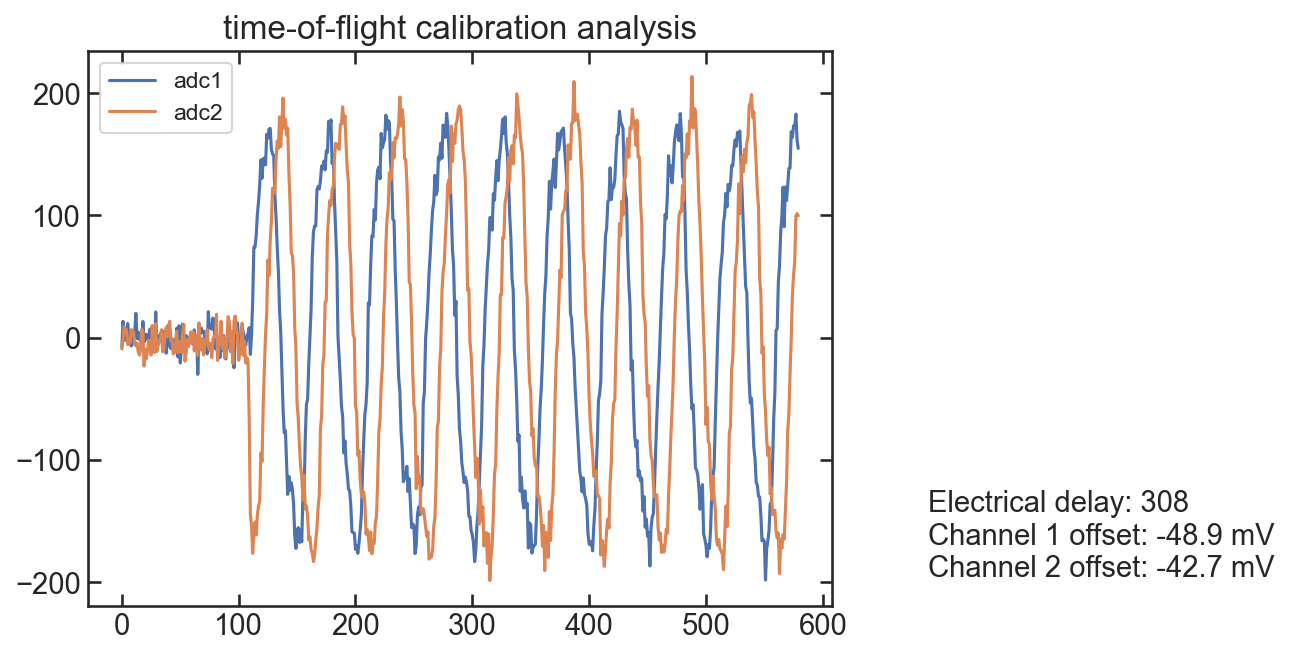

In [26]:
%matplotlib inline
qb.update_value('readout_atten',10)
qb.update_value('tof',200)
# qb.update_value('smearing',10)
# qb.update_value('tof',100)
# qb.update_value('amp_r',0.4)
qb.pars['resettime']['rr'] = 5000
qb.write_pars()
# qb.update_value('tof', 100)
qb.update_value('n_avg',300)
qb.update_value('rr_IF',20e6)
qb.update_value('readout_length',500)

adc1,adc2 = qb.tof_cal(update_tof=True)
pf.tof_plot(adc1, adc2,delay=qb.pars['tof'],offsets=qb.pars['analog_input_offsets'])

In [4]:
qb.pars['tof']

308

# Optimize Mixers

## Readout

### Minimize LO leakage 

Setting sa frequency to 6900000000.0.
Setting sa span to 100000.0.
Setting sa threshold to -10.
Setting sa bandwidth to 100.0.


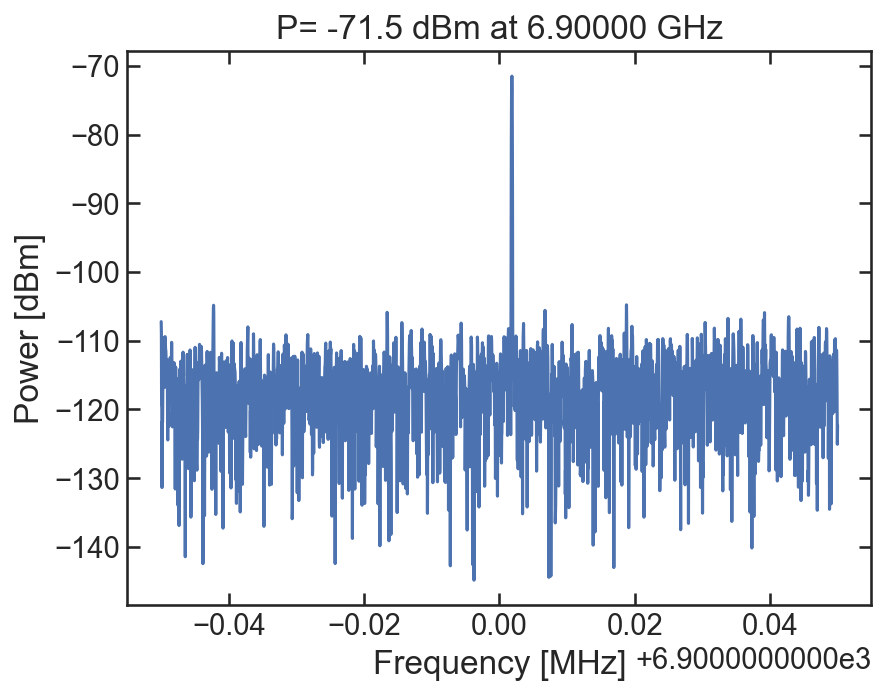

-71.50566864013672 dBm at 6.900001839531607 GHz
Updating readout_atten to 0
Setting DA attenuation to 0.
Setting sa frequency to 6900000000.0.
Setting sa span to 500000.0.
Setting sa threshold to -20.
Setting sa bandwidth to 100.0.
LO at 6.9 GHz
Current I_offset = -13.1 mV, Current Q_offset = 0.9 mV
Setting sa frequency to 6900000000.0.
Setting sa span to 500000.0.
Setting sa threshold to -28.108325958251953.
Setting sa bandwidth to 100.0.


100%|██████████| 121/121 [00:43<00:00,  2.81it/s]


Updating rr_mixer_offsets to [-0.013199999999999993, 0.0008000000000000012]
optimal I_offset = -13.2 mV, optimal Q_offset = 0.8 mV
Updating readout_atten to 25
Setting DA attenuation to 25.
Power: -82.06979370117188 dBm at 6.9 GHz


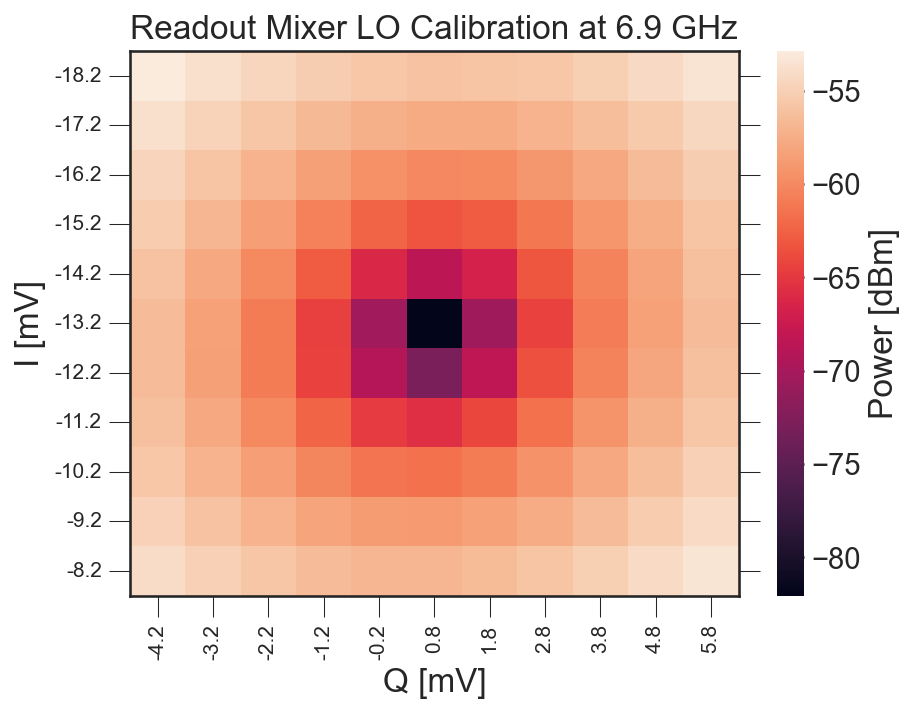

In [4]:
#qb.update_value('rr_LO',6.4e9)
qb.get_power(fc=qb.pars['rr_LO'],threshold=-10,sa_span=0.1e6,config=True,plot=True)
qb.opt_lo_leakage(mode='coarse',element='rr',sa_span=0.5e6,threshold=-20,plot=True)

Updating readout_atten to 25
Setting DA attenuation to 25.
25
Updating readout_atten to 0
Setting DA attenuation to 0.
Setting sa frequency to 6900000000.0.
Setting sa span to 200000.0.
Setting sa threshold to -40.
Setting sa bandwidth to 100.0.
LO at 6.9 GHz
Current I_offset = -13.2 mV, Current Q_offset = 0.8 mV
Setting sa frequency to 6900000000.0.
Setting sa span to 200000.0.
Setting sa threshold to -30.1246337890625.
Setting sa bandwidth to 100.0.


100%|██████████| 121/121 [01:08<00:00,  1.77it/s]


Updating rr_mixer_offsets to [-0.013249999999999987, 0.0007500000000000015]
optimal I_offset = -13.2 mV, optimal Q_offset = 0.8 mV
25
Updating readout_atten to 25
Setting DA attenuation to 25.
Power: -79.3094482421875 dBm at 6.9 GHz


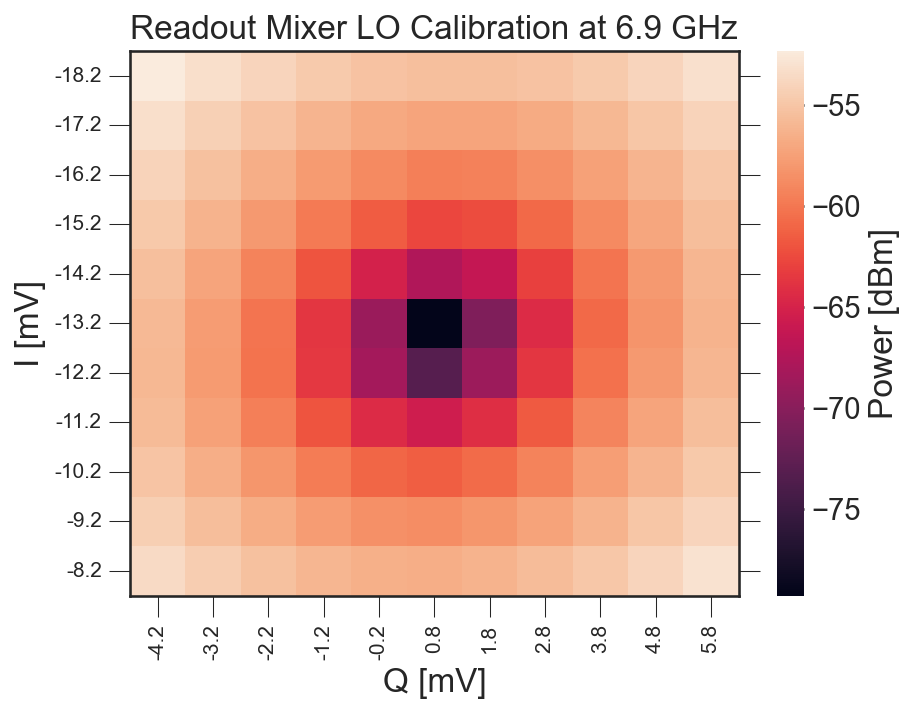

In [6]:
# qb.update_value('readout_atten',25)
qb.opt_lo_leakage(mode='coarse',element='rr',sa_span=0.2e6,threshold=-40,plot=True)

### Minimize image sideband

Updating readout_atten to 0
Setting DA attenuation to 0.
Setting sa frequency to 6820340250.0.
Setting sa span to 100000.0.
Setting sa threshold to -40.
Setting sa bandwidth to 100.0.


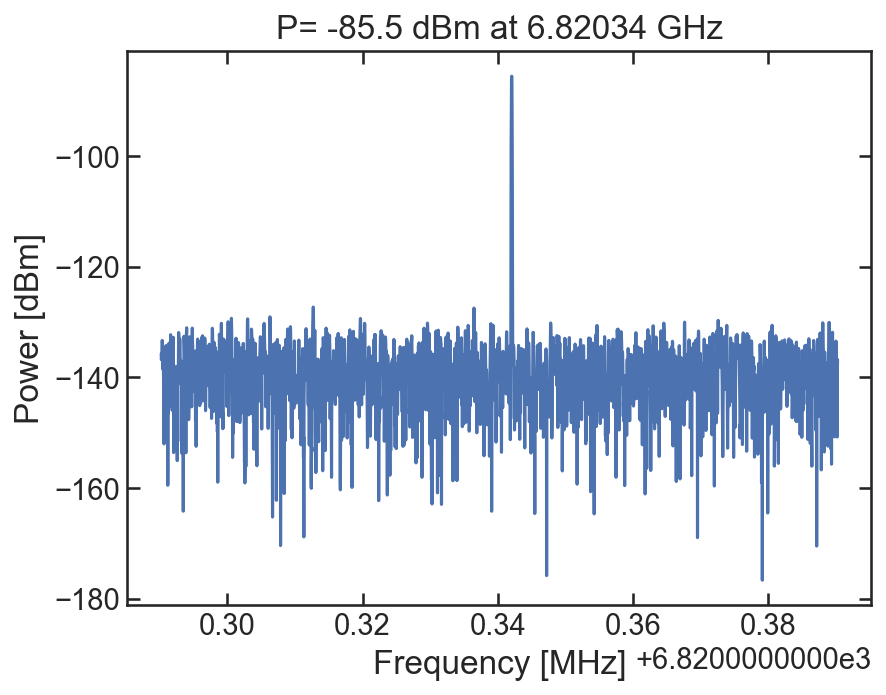

-85.52714538574219 dBm at 6.82034205986174 GHz
Sideband at 6.82034 GHz
Current gain = 0.0028, Current phase = -0.0444


100%|██████████| 100/100 [00:56<00:00,  1.78it/s]


Updating rr_mixer_imbalance to (0.013888888888888895, -0.016666666666666663)
optimal gain = 0.0139, optimal phi = -0.0167
Updating readout_atten to 25
Setting DA attenuation to 25.
Power: -62.495418548583984 dBm at 6.82034025 GHz


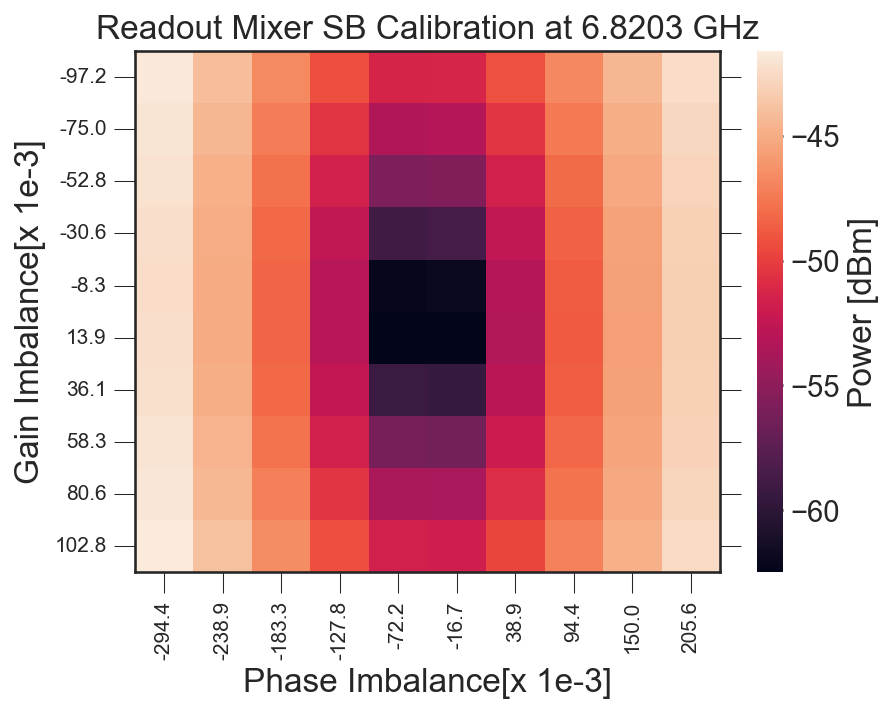

In [7]:
# qb.update_value('rr_IF',50e6)
qb.opt_sideband(mode='coarse',element='rr',sa_span=0.1e6,threshold=-40,plot=True)

2024-09-25 16:21:31,255 - qm - INFO     - Sending program to QOP for compilation
2024-09-25 16:21:31,292 - qm - INFO     - Executing program
Updating readout_atten to 0
Setting DA attenuation to 0.
Setting sa frequency to 6380000000.0.
Setting sa span to 500000.0.
Setting sa threshold to -50.
Setting sa bandwidth to 100.0.


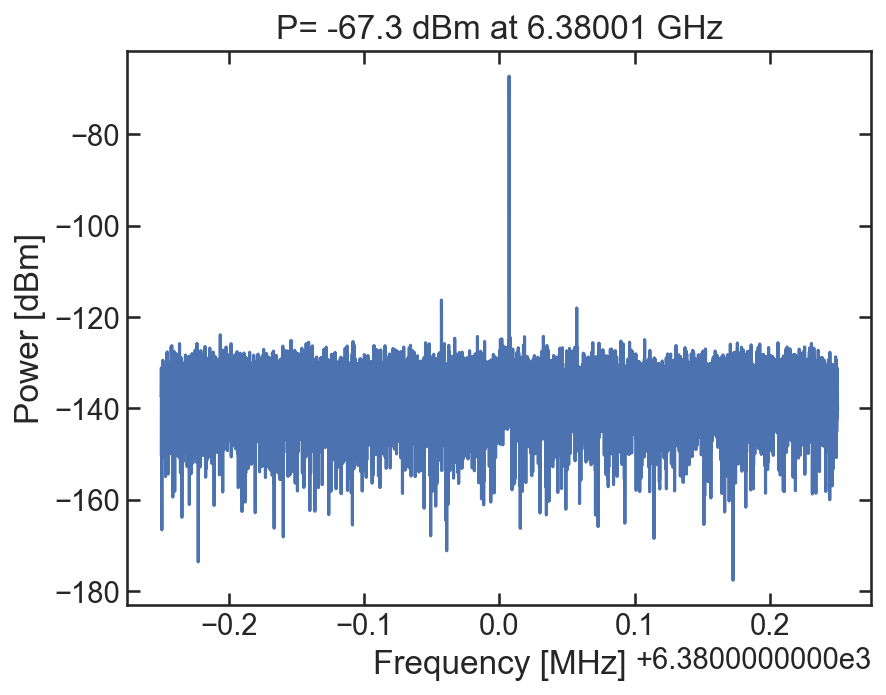

-67.34053039550781 dBm at 6.380007186350242 GHz
Sideband at 6.38 GHz
Current gain = -0.0111, Current phase = -0.0833


100%|██████████| 100/100 [00:35<00:00,  2.85it/s]


Updating rr_mixer_imbalance to (-0.002777777777777782, -0.06666666666666668)
optimal gain = -0.0028, optimal phi = -0.0667
Updating readout_atten to 0
Setting DA attenuation to 0.
Power: -82.15008544921875 dBm at 6.38 GHz


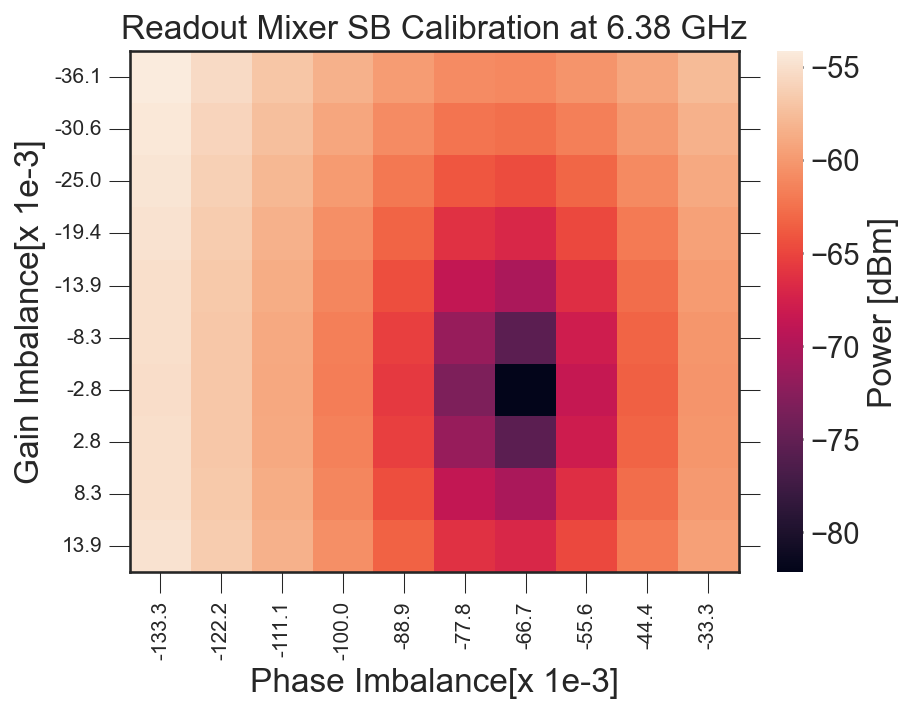

In [9]:
qb.opt_sideband(mode='fine',element='rr',sa_span=0.5e6,threshold=-50,plot=True)

## Qubit

### Minimize leakage

In [386]:
qb.update_value('readout_atten',27)

Updating readout_atten to 27
Setting DA attenuation to 27.


Setting sa frequency to 4506400000.0.
Setting sa span to 50000.0.
Setting sa threshold to -10.
Setting sa bandwidth to 100.0.


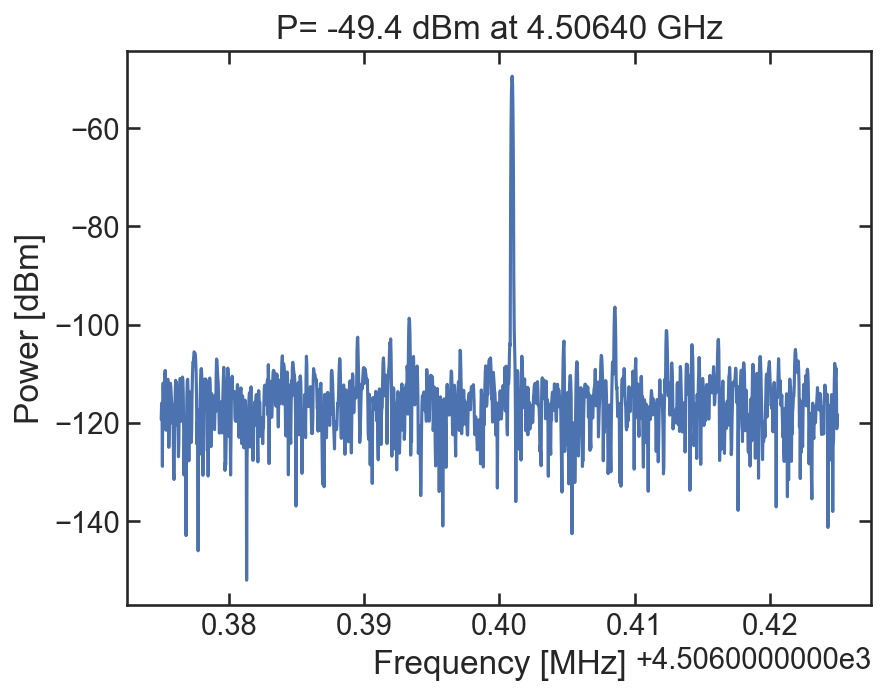

-49.43556213378906 dBm at 4.506400949435671 GHz
Setting sa frequency to 4506400000.0.
Setting sa span to 100000.0.
Setting sa threshold to -20.
Setting sa bandwidth to 100.0.
LO at 4.5064 GHz
Current I_offset = -1.3 mV, Current Q_offset = 0.7 mV
Setting sa frequency to 4506400000.0.
Setting sa span to 100000.0.
Setting sa threshold to -29.44849395751953.
Setting sa bandwidth to 100.0.


100%|██████████| 121/121 [01:08<00:00,  1.77it/s]


Updating qubit_mixer_offsets to [-0.004399999999999998, 0.0016000000000000025]
optimal I_offset = -4.4 mV, optimal Q_offset = 1.6 mV
Power: -72.80752563476562 dBm at 4.5064 GHz


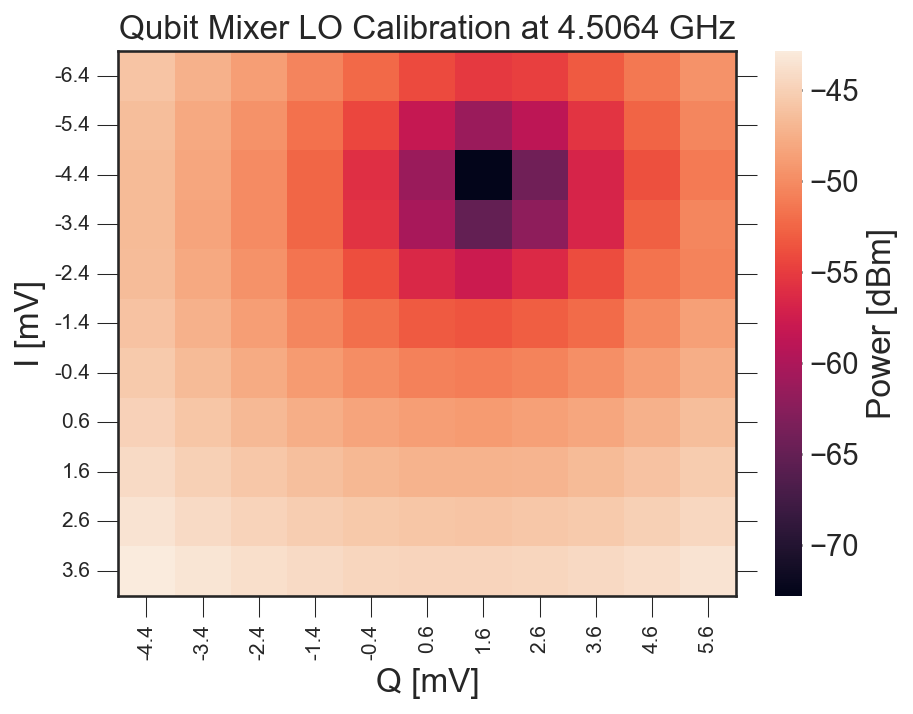

In [97]:
# qb.updatea_value('rr_LO',e9)
qb.get_power(fc=qb.pars['qubit_LO'],threshold=-10,sa_span=0.05e6,config=True,plot=True)
qb.opt_lo_leakage(mode='coarse',element='qubit',sa_span=0.1e6,threshold=-20,plot=True)

In [ ]:
qb.opt_lo_leakage(mode='coarse',element='qubit',sa_span=0.2e6,threshold=-40,plot=True)

### Minimize image sideband

In [64]:
qb.pars['qubit_IF']

-50000000.0

2024-10-14 12:00:47,434 - qm - INFO     - Sending program to QOP for compilation
2024-10-14 12:00:47,459 - qm - INFO     - Executing program
Setting sa frequency to 4556400000.0.
Setting sa span to 500000.0.
Setting sa threshold to -40.
Setting sa bandwidth to 100.0.


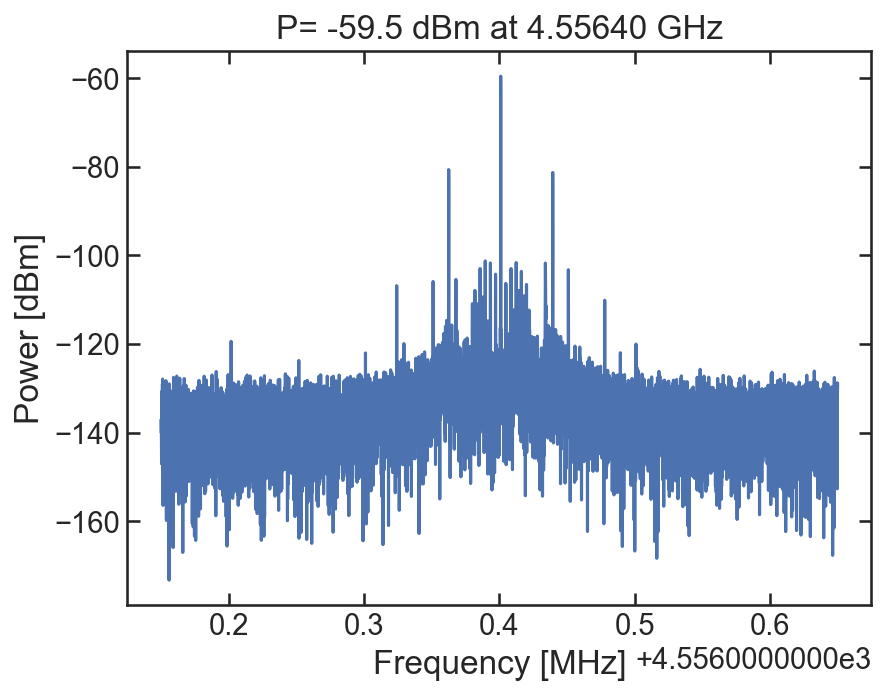

-59.53256607055664 dBm at 4.556400966491202 GHz
Sideband at 4.5564 GHz
Current gain = 0.0028, Current phase = 0.0111


100%|██████████| 100/100 [00:35<00:00,  2.85it/s]


Updating qubit_mixer_imbalance to (0.013888888888888867, 0.038888888888888695)
optimal gain = 0.0139, optimal phi = 0.0389
Power: -54.58026885986328 dBm at 4.5564 GHz


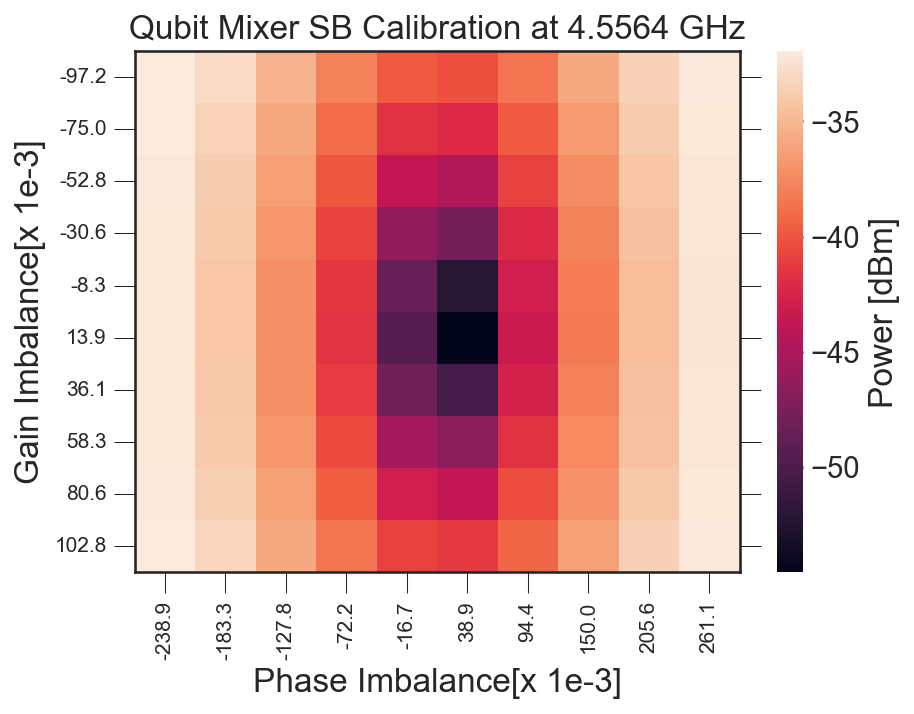

In [98]:
# qb.update_value('qubit_IF',150e6)
# qb.get_power(fc=qb.pars['qubit_LO']-qb.pars['qubit_IF'],threshold=-10,sa_span=0.1e6,config=True,plot=True)
qb.opt_sideband(mode='coarse',amplitude=0.3,element='qubit',sa_span=0.5e6,threshold=-40,plot=True)

2024-10-14 12:04:32,664 - qm - INFO     - Sending program to QOP for compilation
2024-10-14 12:04:32,716 - qm - INFO     - Executing program
Setting sa frequency to 4456400000.0.
Setting sa span to 100000.0.
Setting sa threshold to -10.
Setting sa bandwidth to 100.0.


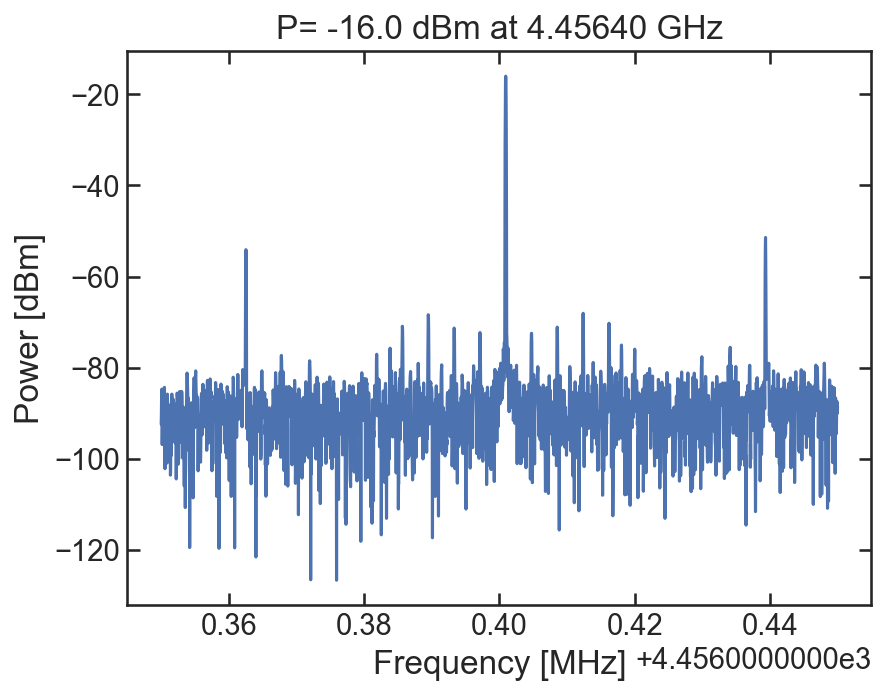

-16.028934478759766 dBm at 4.456400919765715 GHz


-16.028934

In [99]:
qb.play_pulses(amplitude=0.5, element='qubit')
qb.get_power(fc=qb.pars['qubit_LO']+qb.pars['qubit_IF'],threshold=-10,sa_span=0.1e6,config=True,plot=True)

2024-10-14 12:04:40,231 - qm - INFO     - Sending program to QOP for compilation
2024-10-14 12:04:40,254 - qm - INFO     - Executing program
Setting sa frequency to 4556400000.0.
Setting sa span to 100000.0.
Setting sa threshold to -50.
Setting sa bandwidth to 100.0.


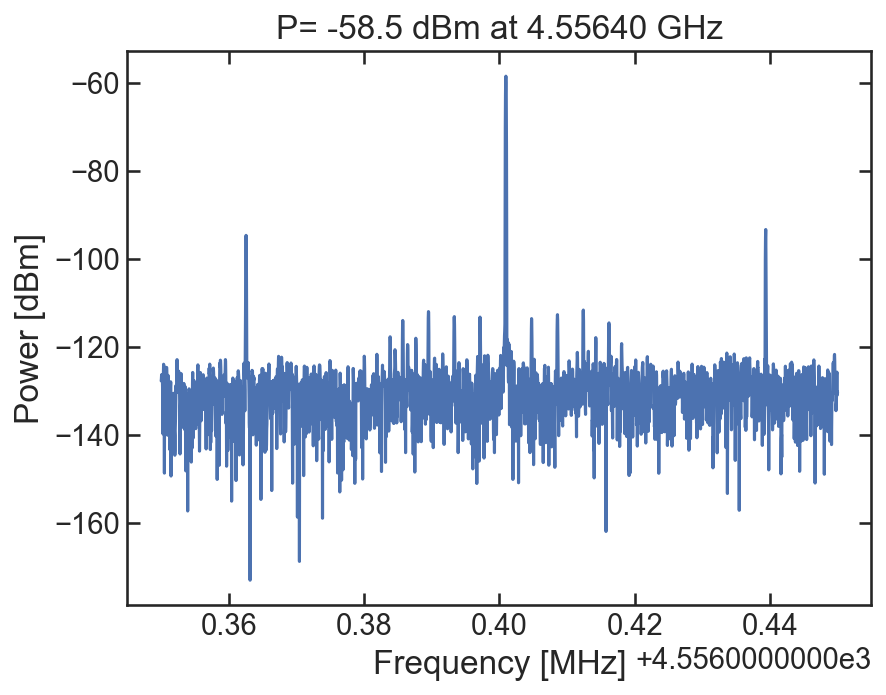

-58.488460540771484 dBm at 4.556400949435583 GHz
Sideband at 4.5564 GHz
Current gain = 0.0139, Current phase = 0.0389


100%|██████████| 100/100 [00:56<00:00,  1.77it/s]


Updating qubit_mixer_imbalance to (0.011111111111111089, 0.022222222222222025)
optimal gain = 0.0111, optimal phi = 0.0222
Power: -73.97293853759766 dBm at 4.5564 GHz


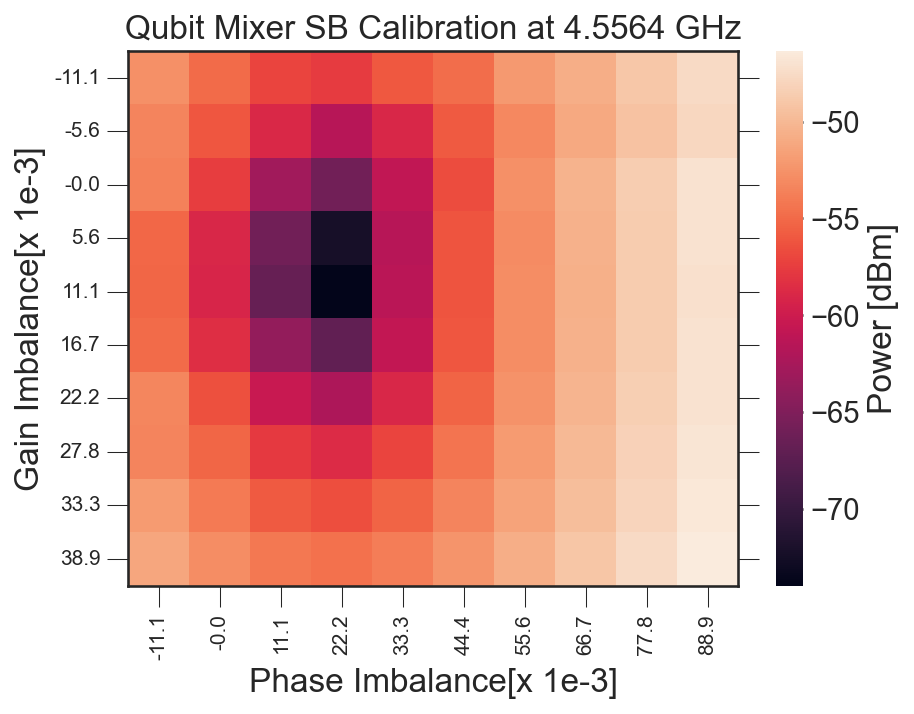

In [100]:
qb.opt_sideband(mode='fine',element='qubit',sa_span=0.1e6,threshold=-50,plot=True)

# Resonator spectroscopy

**Notes on resonator spectroscopy**

In [8]:
qb.update_value('readout_length', 10000)   ##wanted a clearer peak
# qb.update_value('tof',256)
# qb.update_value('smearing',60)
# qb.update_value('rr_resettime',5000)
# qb.pars['resettime']['rr'] = 2000|
# qb.write_pars()
qb.update_value('n_avg',300)
qb.update_value('readout_atten',25)
qb.update_value('switch_weights',False)
# qb.update_value('amp_r',0.4)
df_resonator_spec = 0.75e3
qb.experiment = 'resonator_spec'
##added a 10db fixed attenuator on rr line after the spiltter and just before fridge input
data, job = qb.resonator_spec(
                       f_LO = 6.9e9,
                       IF_min = 79.5e6,
                       IF_max = 79.9e6,
                       df = df_resonator_spec,
                       fit=True,
                       savedata=False,
                       showprogress=True)

Updating readout_length to 10000
Updating n_avg to 300
Updating readout_atten to 25
Setting DA attenuation to 25.
Updating switch_weights to False
Updating rr_LO to 6900000000.0
Setting readout_LO frequency to 6900000000.0.
2024-10-14 09:53:04,209 - qm - INFO     - Performing health check
2024-10-14 09:53:04,225 - qm - INFO     - Health check passed
2024-10-14 09:53:04,925 - qm - INFO     - Sending program to QOP for compilation
2024-10-14 09:53:05,798 - qm - INFO     - Executing program


100%|█████████▉| 299/300 [00:06<00:00, 43.50it/s]


Resonant Frequency: 6.97966 GHz
FWHM = 21.0 kHz
kappa = 131.947 kHz


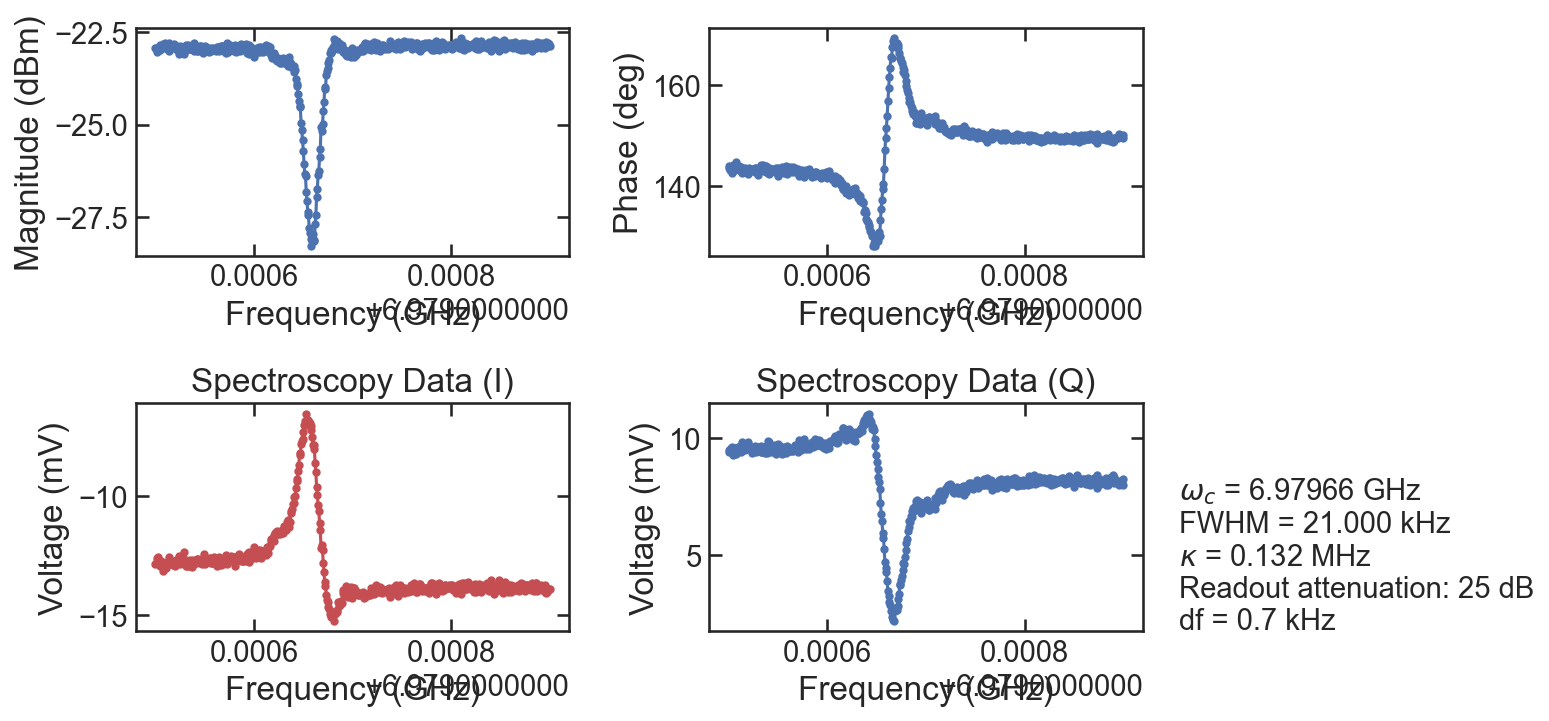

In [9]:
fc,fwhm = pf.fit_res(data['freqs'],data['I'],data['Q'])
pf.resonator_spec_plot(data,qb_pars=qb.pars,fwhm=fwhm,fc=fc)

In [404]:
qb.update_value('rr_freq',fc)
qb.update_value('rr_IF', fc-qb.pars['rr_LO'])

Updating rr_freq to 6979659750.0
Updating rr_IF to 79659750.0


In [20]:
from resonator import Resonator

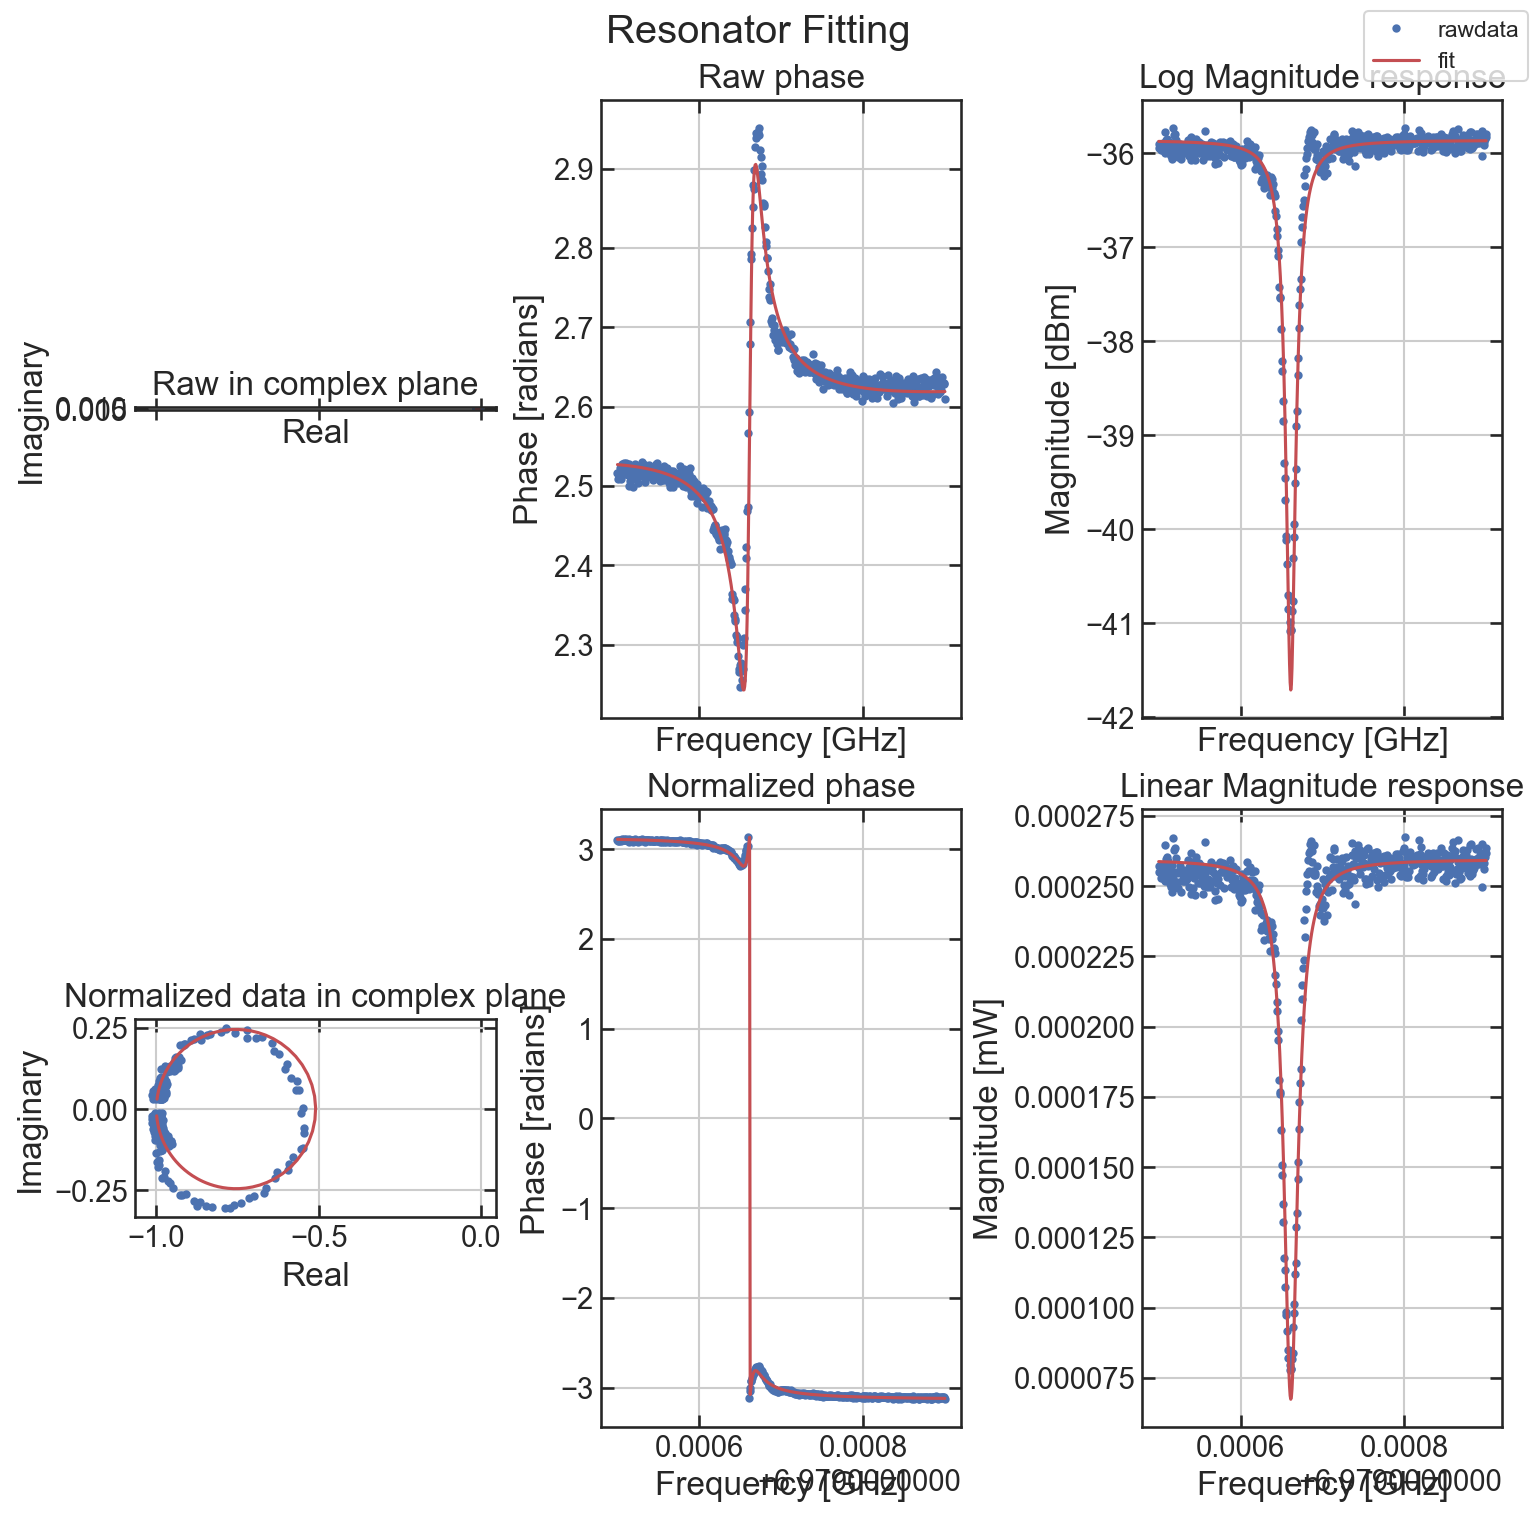

Frequency: 6.9797 GHz
Total Q: 345416
Internal Q: 457582
Coupling Q: 1409125
FWHM: 0.02021 MHz
Kappa: 0.12696 MHz
Single Photon Power: -152.2 dBm
Ringdown Time: 10.919 us
Impedance Mismatch 6.001 degrees
Electrical Delay: -16.177284 ns
SNR: 3313011.5


In [21]:
res = Resonator(port_type='r',f_data=data['freqs'],z_data=data['I']+1j*data['Q'])
res.autofit()
res.show()
print(res)


# Qubit Punchout

**Notes on qubit punchout**

*Objectives*
1. Determine if there is a qubit coupled to a cavity.
2. Determine the readout power at which the qubit is punched out. Used for subsequent measurements.

Starting at low readout power and then gradually decreasing the attenuation, you should see the readout resonance shift in frequency. Since the qubit and readout resonances repel each other, if the qubit frequency is less than the readout frequency, the resonant frequency whill shift to lower frequency after the qubit is punched out, and vice versa. Between the high and low readout power frequencies, the resonator behaves in a non-linear way. We definitely want to operate outside of that region. 

In [22]:
attenuations = np.linspace(0,35,25)
qb.update_value('n_avg',50)
data, job = qb.punchout(df = 0.75e3,
                       IF_min = 79e6,
                       IF_max = 79.72e6,
                        attenuations=attenuations,
                        adaptive_averaging=True,
                        averaging_factor=1.1,
                        savedata=False)

Updating n_avg to 50


  0%|          | 0/25 [00:00<?, ?it/s]

Attenuation = 0.0 dB
Setting DA attenuation to 0.0.
Updating rr_LO to 6900000000.0
Setting readout_LO frequency to 6900000000.0.
2024-10-11 11:52:29,585 - qm - INFO     - Performing health check
2024-10-11 11:52:29,615 - qm - INFO     - Health check passed
2024-10-11 11:52:30,400 - qm - INFO     - Sending program to QOP for compilation
2024-10-11 11:52:30,760 - qm - INFO     - Executing program


  4%|▍         | 1/25 [00:03<01:28,  3.69s/it]

Updating n_avg to 55
Attenuation = 1.4583333333333333 dB
Setting DA attenuation to 1.4583333333333333.
Updating rr_LO to 6900000000.0
Setting readout_LO frequency to 6900000000.0.
2024-10-11 11:52:33,219 - qm - INFO     - Performing health check
2024-10-11 11:52:33,233 - qm - INFO     - Health check passed
2024-10-11 11:52:33,878 - qm - INFO     - Sending program to QOP for compilation
2024-10-11 11:52:34,180 - qm - INFO     - Executing program


  8%|▊         | 2/25 [00:07<01:23,  3.65s/it]

Updating n_avg to 60
Attenuation = 2.9166666666666665 dB
Setting DA attenuation to 2.9166666666666665.
Updating rr_LO to 6900000000.0
Setting readout_LO frequency to 6900000000.0.
2024-10-11 11:52:36,829 - qm - INFO     - Performing health check
2024-10-11 11:52:36,840 - qm - INFO     - Health check passed
2024-10-11 11:52:37,606 - qm - INFO     - Sending program to QOP for compilation
2024-10-11 11:52:37,868 - qm - INFO     - Executing program


 12%|█▏        | 3/25 [00:11<01:22,  3.73s/it]

Updating n_avg to 66
Attenuation = 4.375 dB
Setting DA attenuation to 4.375.
Updating rr_LO to 6900000000.0
Setting readout_LO frequency to 6900000000.0.
2024-10-11 11:52:40,637 - qm - INFO     - Performing health check
2024-10-11 11:52:40,651 - qm - INFO     - Health check passed
2024-10-11 11:52:41,344 - qm - INFO     - Sending program to QOP for compilation
2024-10-11 11:52:41,673 - qm - INFO     - Executing program


 16%|█▌        | 4/25 [00:15<01:21,  3.88s/it]

Updating n_avg to 72
Attenuation = 5.833333333333333 dB
Setting DA attenuation to 5.833333333333333.
Updating rr_LO to 6900000000.0
Setting readout_LO frequency to 6900000000.0.
2024-10-11 11:52:44,759 - qm - INFO     - Performing health check
2024-10-11 11:52:44,772 - qm - INFO     - Health check passed
2024-10-11 11:52:45,550 - qm - INFO     - Sending program to QOP for compilation
2024-10-11 11:52:45,913 - qm - INFO     - Executing program


 20%|██        | 5/25 [00:21<01:31,  4.60s/it]

Updating n_avg to 79
Attenuation = 7.291666666666666 dB
Setting DA attenuation to 7.291666666666666.
Updating rr_LO to 6900000000.0
Setting readout_LO frequency to 6900000000.0.
2024-10-11 11:52:50,871 - qm - INFO     - Performing health check
2024-10-11 11:52:51,129 - qm - INFO     - Health check passed
2024-10-11 11:52:51,888 - qm - INFO     - Sending program to QOP for compilation
2024-10-11 11:52:52,599 - qm - INFO     - Executing program


 24%|██▍       | 6/25 [00:26<01:31,  4.81s/it]

Updating n_avg to 86
Attenuation = 8.75 dB
Setting DA attenuation to 8.75.
Updating rr_LO to 6900000000.0
Setting readout_LO frequency to 6900000000.0.
2024-10-11 11:52:55,822 - qm - INFO     - Performing health check
2024-10-11 11:52:55,835 - qm - INFO     - Health check passed
2024-10-11 11:52:56,561 - qm - INFO     - Sending program to QOP for compilation
2024-10-11 11:52:56,857 - qm - INFO     - Executing program


 28%|██▊       | 7/25 [00:31<01:27,  4.84s/it]

Updating n_avg to 94
Attenuation = 10.208333333333332 dB
Setting DA attenuation to 10.208333333333332.
Updating rr_LO to 6900000000.0
Setting readout_LO frequency to 6900000000.0.
2024-10-11 11:53:00,750 - qm - INFO     - Performing health check
2024-10-11 11:53:00,762 - qm - INFO     - Health check passed
2024-10-11 11:53:01,407 - qm - INFO     - Sending program to QOP for compilation
2024-10-11 11:53:01,705 - qm - INFO     - Executing program


 32%|███▏      | 8/25 [00:36<01:24,  4.95s/it]

Updating n_avg to 103
Attenuation = 11.666666666666666 dB
Setting DA attenuation to 11.666666666666666.
Updating rr_LO to 6900000000.0
Setting readout_LO frequency to 6900000000.0.
2024-10-11 11:53:05,928 - qm - INFO     - Performing health check
2024-10-11 11:53:05,941 - qm - INFO     - Health check passed
2024-10-11 11:53:06,659 - qm - INFO     - Sending program to QOP for compilation
2024-10-11 11:53:06,919 - qm - INFO     - Executing program


 36%|███▌      | 9/25 [00:41<01:22,  5.14s/it]

Updating n_avg to 113
Attenuation = 13.125 dB
Setting DA attenuation to 13.125.
Updating rr_LO to 6900000000.0
Setting readout_LO frequency to 6900000000.0.
2024-10-11 11:53:11,483 - qm - INFO     - Performing health check
2024-10-11 11:53:11,517 - qm - INFO     - Health check passed
2024-10-11 11:53:12,299 - qm - INFO     - Sending program to QOP for compilation
2024-10-11 11:53:12,629 - qm - INFO     - Executing program


 40%|████      | 10/25 [00:48<01:21,  5.44s/it]

Updating n_avg to 124
Attenuation = 14.583333333333332 dB
Setting DA attenuation to 14.583333333333332.
Updating rr_LO to 6900000000.0
Setting readout_LO frequency to 6900000000.0.
2024-10-11 11:53:17,628 - qm - INFO     - Performing health check
2024-10-11 11:53:17,642 - qm - INFO     - Health check passed
2024-10-11 11:53:18,283 - qm - INFO     - Sending program to QOP for compilation
2024-10-11 11:53:18,581 - qm - INFO     - Executing program


 44%|████▍     | 11/25 [00:54<01:20,  5.73s/it]

Updating n_avg to 136
Attenuation = 16.041666666666664 dB
Setting DA attenuation to 16.041666666666664.
Updating rr_LO to 6900000000.0
Setting readout_LO frequency to 6900000000.0.
2024-10-11 11:53:24,003 - qm - INFO     - Performing health check
2024-10-11 11:53:24,025 - qm - INFO     - Health check passed
2024-10-11 11:53:24,766 - qm - INFO     - Sending program to QOP for compilation
2024-10-11 11:53:25,049 - qm - INFO     - Executing program


 48%|████▊     | 12/25 [01:01<01:19,  6.11s/it]

Updating n_avg to 149
Attenuation = 17.5 dB
Setting DA attenuation to 17.5.
Updating rr_LO to 6900000000.0
Setting readout_LO frequency to 6900000000.0.
2024-10-11 11:53:30,963 - qm - INFO     - Performing health check
2024-10-11 11:53:30,976 - qm - INFO     - Health check passed
2024-10-11 11:53:31,589 - qm - INFO     - Sending program to QOP for compilation
2024-10-11 11:53:31,889 - qm - INFO     - Executing program


 52%|█████▏    | 13/25 [01:08<01:18,  6.50s/it]

Updating n_avg to 163
Attenuation = 18.958333333333332 dB
Setting DA attenuation to 18.958333333333332.
Updating rr_LO to 6900000000.0
Setting readout_LO frequency to 6900000000.0.
2024-10-11 11:53:38,362 - qm - INFO     - Performing health check
2024-10-11 11:53:38,374 - qm - INFO     - Health check passed
2024-10-11 11:53:39,125 - qm - INFO     - Sending program to QOP for compilation
2024-10-11 11:53:39,429 - qm - INFO     - Executing program


 56%|█████▌    | 14/25 [01:16<01:16,  6.97s/it]

Updating n_avg to 179
Attenuation = 20.416666666666664 dB
Setting DA attenuation to 20.416666666666664.
Updating rr_LO to 6900000000.0
Setting readout_LO frequency to 6900000000.0.
2024-10-11 11:53:46,415 - qm - INFO     - Performing health check
2024-10-11 11:53:46,429 - qm - INFO     - Health check passed
2024-10-11 11:53:47,090 - qm - INFO     - Sending program to QOP for compilation
2024-10-11 11:53:47,397 - qm - INFO     - Executing program


 60%|██████    | 15/25 [01:25<01:14,  7.48s/it]

Updating n_avg to 196
Attenuation = 21.875 dB
Setting DA attenuation to 21.875.
Updating rr_LO to 6900000000.0
Setting readout_LO frequency to 6900000000.0.
2024-10-11 11:53:55,101 - qm - INFO     - Performing health check
2024-10-11 11:53:55,115 - qm - INFO     - Health check passed
2024-10-11 11:53:55,830 - qm - INFO     - Sending program to QOP for compilation
2024-10-11 11:53:56,155 - qm - INFO     - Executing program


 64%|██████▍   | 16/25 [01:35<01:12,  8.07s/it]

Updating n_avg to 215
Attenuation = 23.333333333333332 dB
Setting DA attenuation to 23.333333333333332.
Updating rr_LO to 6900000000.0
Setting readout_LO frequency to 6900000000.0.
2024-10-11 11:54:04,527 - qm - INFO     - Performing health check
2024-10-11 11:54:04,540 - qm - INFO     - Health check passed
2024-10-11 11:54:05,178 - qm - INFO     - Sending program to QOP for compilation
2024-10-11 11:54:05,503 - qm - INFO     - Executing program


 68%|██████▊   | 17/25 [01:45<01:09,  8.69s/it]

Updating n_avg to 236
Attenuation = 24.791666666666664 dB
Setting DA attenuation to 24.791666666666664.
Updating rr_LO to 6900000000.0
Setting readout_LO frequency to 6900000000.0.
2024-10-11 11:54:14,660 - qm - INFO     - Performing health check
2024-10-11 11:54:14,672 - qm - INFO     - Health check passed
2024-10-11 11:54:15,383 - qm - INFO     - Sending program to QOP for compilation
2024-10-11 11:54:15,710 - qm - INFO     - Executing program


 72%|███████▏  | 18/25 [01:56<01:05,  9.41s/it]

Updating n_avg to 259
Attenuation = 26.25 dB
Setting DA attenuation to 26.25.
Updating rr_LO to 6900000000.0
Setting readout_LO frequency to 6900000000.0.
2024-10-11 11:54:25,771 - qm - INFO     - Performing health check
2024-10-11 11:54:25,784 - qm - INFO     - Health check passed
2024-10-11 11:54:26,573 - qm - INFO     - Sending program to QOP for compilation
2024-10-11 11:54:26,885 - qm - INFO     - Executing program


 76%|███████▌  | 19/25 [02:08<01:01, 10.23s/it]

Updating n_avg to 284
Attenuation = 27.708333333333332 dB
Setting DA attenuation to 27.708333333333332.
Updating rr_LO to 6900000000.0
Setting readout_LO frequency to 6900000000.0.
2024-10-11 11:54:37,889 - qm - INFO     - Performing health check
2024-10-11 11:54:37,904 - qm - INFO     - Health check passed
2024-10-11 11:54:38,583 - qm - INFO     - Sending program to QOP for compilation
2024-10-11 11:54:38,863 - qm - INFO     - Executing program


 80%|████████  | 20/25 [02:21<00:55, 11.05s/it]

Updating n_avg to 312
Attenuation = 29.166666666666664 dB
Setting DA attenuation to 29.166666666666664.
Updating rr_LO to 6900000000.0
Setting readout_LO frequency to 6900000000.0.
2024-10-11 11:54:50,820 - qm - INFO     - Performing health check
2024-10-11 11:54:50,833 - qm - INFO     - Health check passed
2024-10-11 11:54:51,536 - qm - INFO     - Sending program to QOP for compilation
2024-10-11 11:54:51,868 - qm - INFO     - Executing program


 84%|████████▍ | 21/25 [02:35<00:47, 11.98s/it]

Updating n_avg to 343
Attenuation = 30.625 dB
Setting DA attenuation to 30.625.
Updating rr_LO to 6900000000.0
Setting readout_LO frequency to 6900000000.0.
2024-10-11 11:55:04,982 - qm - INFO     - Performing health check
2024-10-11 11:55:04,995 - qm - INFO     - Health check passed
2024-10-11 11:55:05,616 - qm - INFO     - Sending program to QOP for compilation
2024-10-11 11:55:05,917 - qm - INFO     - Executing program


 88%|████████▊ | 22/25 [02:50<00:38, 12.99s/it]

Updating n_avg to 377
Attenuation = 32.08333333333333 dB
Setting DA attenuation to 32.08333333333333.
Updating rr_LO to 6900000000.0
Setting readout_LO frequency to 6900000000.0.
2024-10-11 11:55:20,324 - qm - INFO     - Performing health check
2024-10-11 11:55:20,336 - qm - INFO     - Health check passed
2024-10-11 11:55:21,089 - qm - INFO     - Sending program to QOP for compilation
2024-10-11 11:55:21,405 - qm - INFO     - Executing program


 92%|█████████▏| 23/25 [03:07<00:28, 14.16s/it]

Updating n_avg to 414
Attenuation = 33.541666666666664 dB
Setting DA attenuation to 33.541666666666664.
Updating rr_LO to 6900000000.0
Setting readout_LO frequency to 6900000000.0.
2024-10-11 11:55:37,203 - qm - INFO     - Performing health check
2024-10-11 11:55:37,216 - qm - INFO     - Health check passed
2024-10-11 11:55:37,836 - qm - INFO     - Sending program to QOP for compilation
2024-10-11 11:55:38,161 - qm - INFO     - Executing program


 96%|█████████▌| 24/25 [03:25<00:15, 15.39s/it]

Updating n_avg to 455
Attenuation = 35.0 dB
Setting DA attenuation to 35.0.
Updating rr_LO to 6900000000.0
Setting readout_LO frequency to 6900000000.0.
2024-10-11 11:55:55,455 - qm - INFO     - Performing health check
2024-10-11 11:55:55,467 - qm - INFO     - Health check passed
2024-10-11 11:55:56,185 - qm - INFO     - Sending program to QOP for compilation
2024-10-11 11:55:56,484 - qm - INFO     - Executing program


100%|██████████| 25/25 [03:45<00:00,  9.04s/it]

Updating n_avg to 500
Setting DA attenuation to 25.


Dispersive shift: -100267.6 kHz
Resonant Frequency: 0.00000 GHz
FWHM = 2.0000000000131026e-08 kHz
kappa = 0.000 kHz
Resonant Frequency: 0.00000 GHz
FWHM = 2.9999999999752445e-08 kHz
kappa = 0.000 kHz


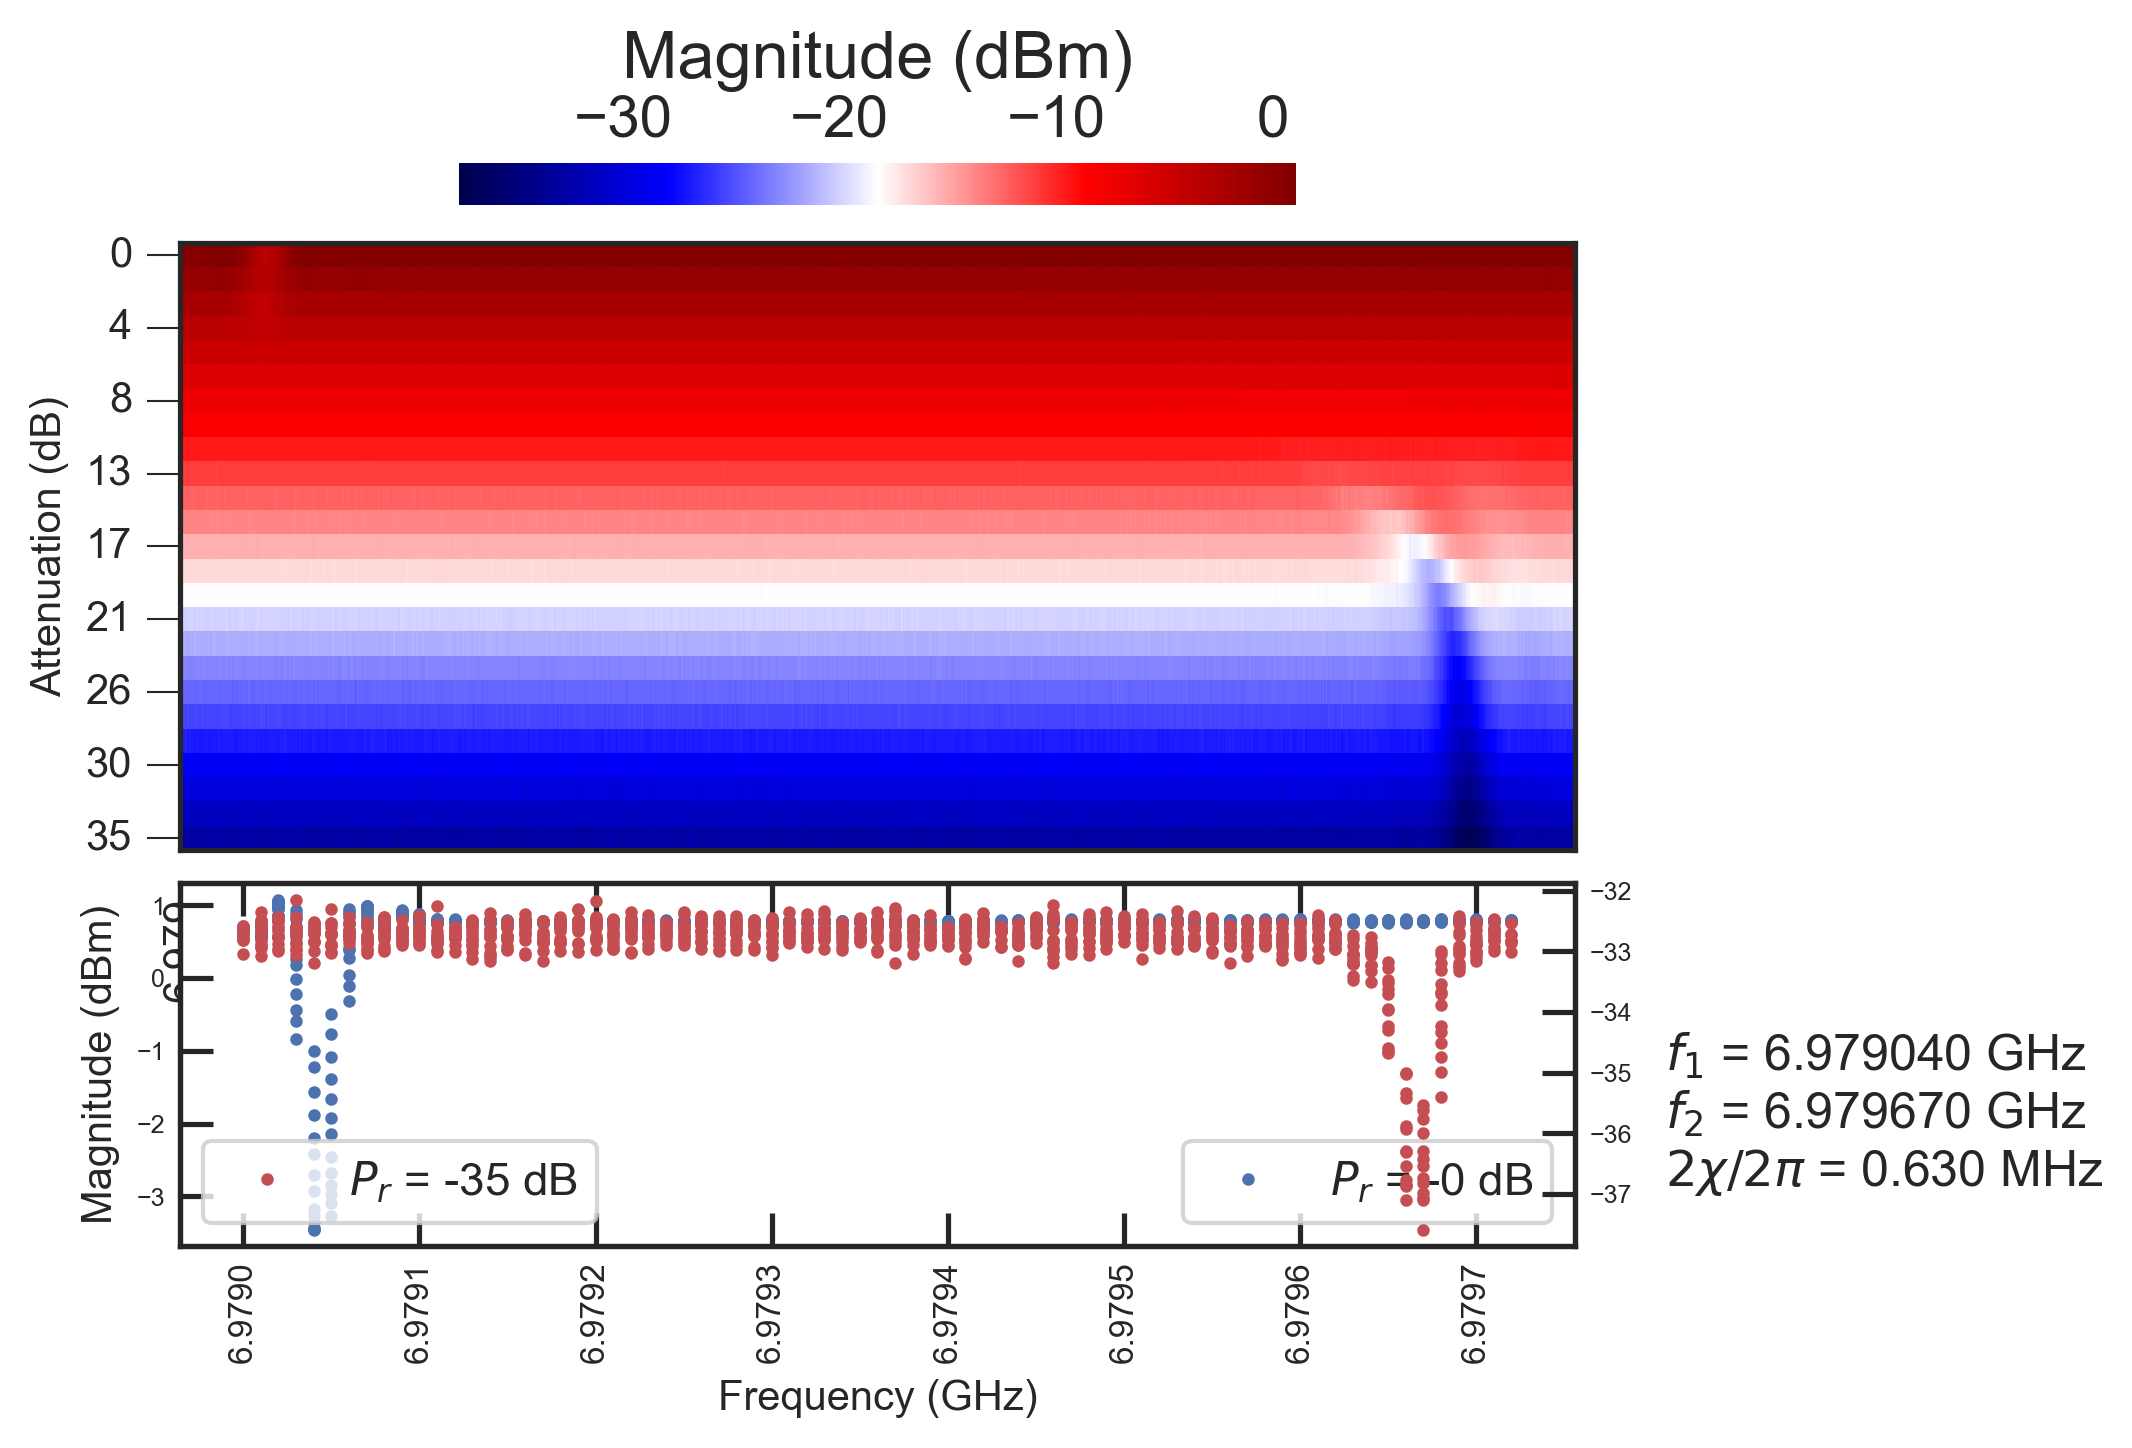

In [24]:
pf.punchout_plot(data,xlabel='Frequency (GHz)',ylabel='Attenuation (dB)',cbar_label='Magnitude (dBm)')

In [117]:
qb.update_value('readout_atten',27)

Updating readout_atten to 27
Setting DA attenuation to 27.


# Qubit Spectroscopy

The first time we run qubit spectroscopy we have to use a high qubit driving amplitude for a couple of reasons. 
1. Detect higher levels like $\omega_{02}/2$ and $\omega_{03}/3$ so you can calculate anharmonicity.
2. Since you don't know exactly what the qubit frequency is going to be (unless you've nailed the fab process), you will have to execute a broad sweep. Driving the qubit at high power broadens the resonance (decreases coherence), makes it easier to detect $\omega_{01}$ -> frequency spacing can be larger.

Due to the negative anharmonicity of the transmon (assuming the device you are working with is a transmon!), the $\omega_{02}/2$ peak is going to have smaller frequency than the $\omega_{01}$ resonance. Keep that in mind when setting up the frequency sweep. 

The *on_off* option of the qubit spectroscopy experiment is there to help distinguish small signals. The off measurement consists of no qubit excitation; just a readout pulse. The on measurement is the regular qubit excitation, followed by readout. The difference between the measurements results is what is saved as our data. The measurement will take almost twice as long, but it might be needed when doing spectroscopy at low powers.

**Some important parameters to setup properly before executing qubit spectroscopy**
1. qubit reset time (qb.pars['resettime']['qubit']): time to wait after performing an ON measurement.
2. amp_q_scaling: explained above
3. 


## Single scan

In [94]:
amp_q_scaling = 0.005
qb.update_value('n_avg',150)
qb.update_value('readout_length', 10000)
qb.pars['resettime']['rr'] = 500
qb.pars['resettime']['qubit'] = 2500
qb.write_pars()
qb.experiment = 'qubit_spec'
%matplotlib qt5
data, job = qb.qubit_spec(element='qubit',
                                check_mixers=False,
                                IF_min=230e6,
                                IF_max=275e6,
                                f_LO=4.2e9,
                                df=0.01e6,
                                on_off=False,
                                amp_q_scaling = amp_q_scaling,
                                saturation_dur = 5e3,
                                liveplot=True,
                                simulate=False,
                                showprogress=True,
                                savedata=False)

Updating n_avg to 150
Updating readout_length to 10000
Updating qubit_LO to 4200000000.0
Setting qubit_LO frequency to 4200000000.0.
2024-10-14 11:54:00,509 - qm - INFO     - Performing health check
2024-10-14 11:54:00,521 - qm - INFO     - Health check passed
2024-10-14 11:54:01,373 - qm - INFO     - Sending program to QOP for compilation
2024-10-14 11:54:01,674 - qm - INFO     - Executing program


  0%|          | 0/150 [00:00<?, ?it/s]


Peak threshold at 9.826123676132795
Peaks at: 4.45642 GHz



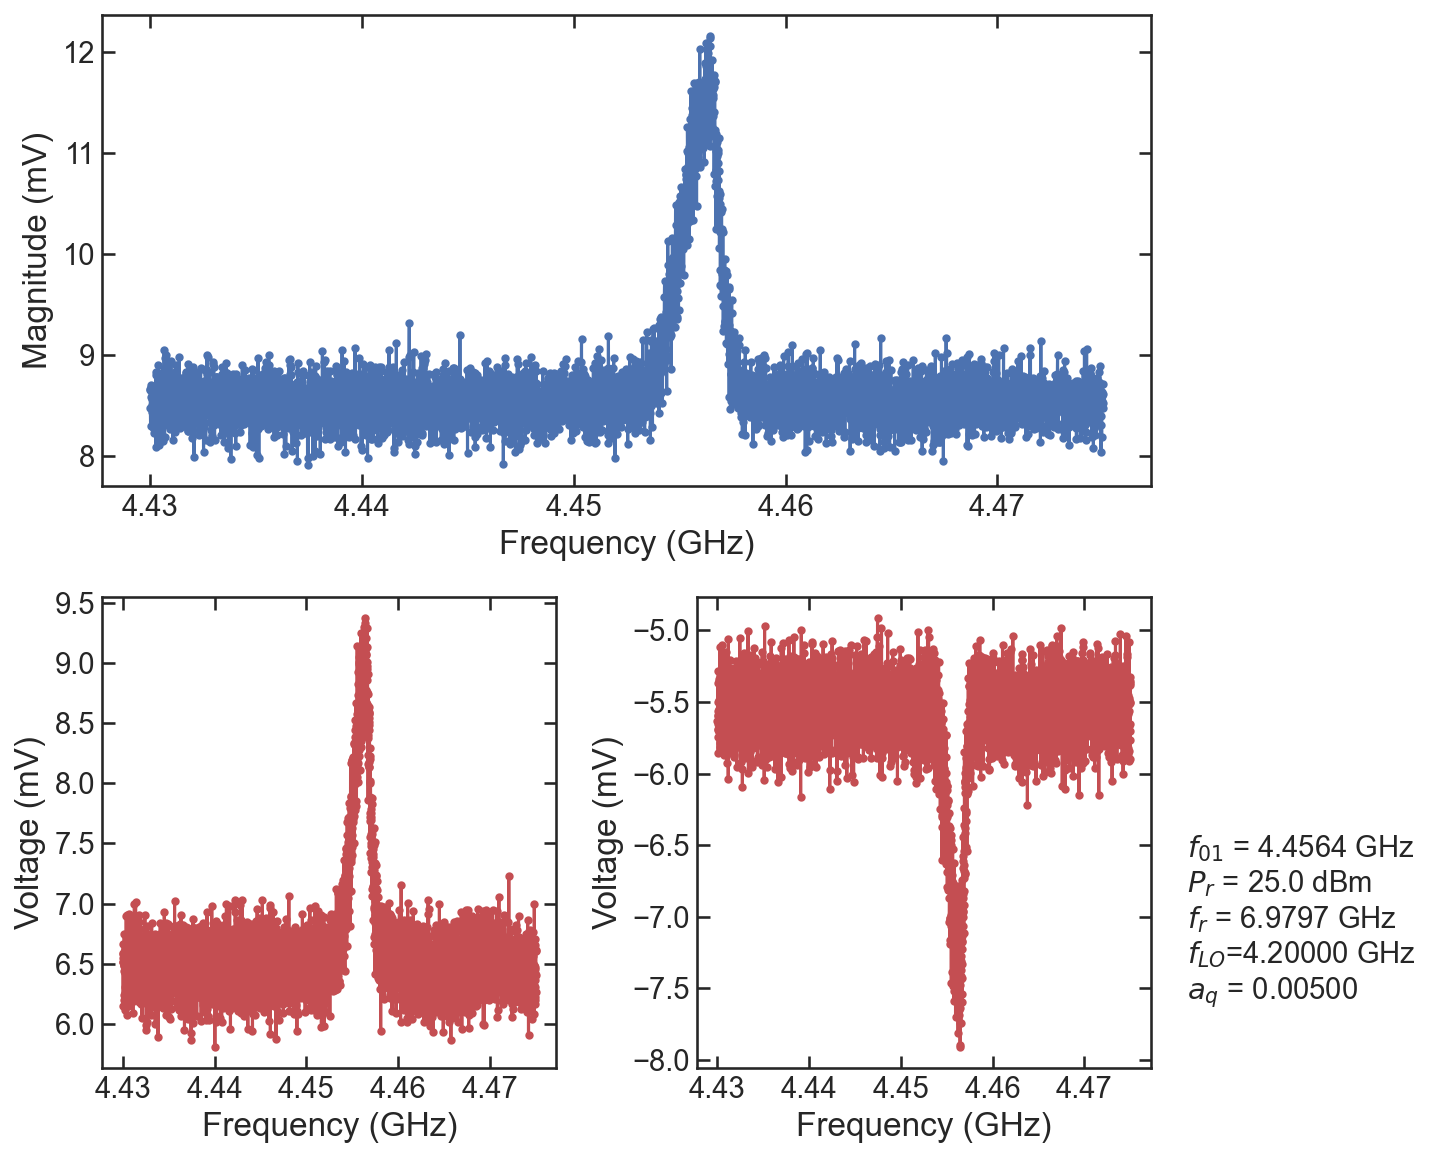

In [95]:
%matplotlib inline
pf.qubit_spec_plot(data,qb_pars=qb.pars,
                   find_peaks=True,
                   peak_width=45, # peak width in samples for peak search algorithm
                    rr_atten=qb.pars['readout_atten'],
                    amp_q_scaling=amp_q_scaling, 
                    qubit_LO=qb.pars['qubit_LO'])

In [96]:
qb.update_value('qubit_LO',4.4564e9+50e6)
qb.update_value('qubit_freq',4.4564e9)
# qb.update_value('qubit_IF',50e6)


Updating qubit_LO to 4506400000.0
Setting qubit_LO frequency to 4506400000.0.
Updating qubit_freq to 4456400000.0
Updating qubit_IF to -50000000.0


## Run broad spectroscopy scan on qubit

In [73]:
qb._instruments.set('sa','frequency',6e9)

Setting sa frequency to 6000000000.0.


In [17]:
qb.update_value('n_avg',20000)
# qb.update_value('readout_length',5000)
# qb.update_value('readout_atten',20)
# qb.update_value('rr_freq', 6.464e9)
# qb.update_value('rr_IF', 50e6)
# qb.update_value('rr_LO', qb.pars['rr_freq'] - qb.pars['rr_IF'])
qb.pars['resettime']['qubit'] = int(20e3)
qb.write_pars()
df_qubit_spec = .5e6
data, job = qb.run_scan(df = df_qubit_spec, element='qubit',
                                check_mixers=False,
                                chunksize = 200e6,
                                lo_min = 6.6e9,
                                lo_max = 7.2e9,
                                amp_q_scaling = 1,
                                on_off=True,
                                saturation_dur = 20e3,                   
                                showprogress=True,
                                savedata=False)

Updating n_avg to 20000


  0%|          | 0/4 [00:00<?, ?it/s]

Updating qubit_LO to 6600000000.0
Setting qubit_LO frequency to 6600000000.0.
Performing two-tone spectroscopy on qubit using rr for readout
Performing two-tone pulsed spectroscopy on qubit using rr for readout
2024-09-25 21:00:46,312 - qm - INFO     - Performing health check
2024-09-25 21:00:46,324 - qm - INFO     - Health check passed
2024-09-25 21:00:47,101 - qm - INFO     - Sending program to QOP for compilation
2024-09-25 21:00:47,402 - qm - INFO     - Executing program


 25%|██▌       | 1/4 [32:03<1:36:09, 1923.33s/it]

Updating qubit_LO to 6800000000.0
Setting qubit_LO frequency to 6800000000.0.
Performing two-tone spectroscopy on qubit using rr for readout
Performing two-tone pulsed spectroscopy on qubit using rr for readout
2024-09-25 21:32:49,683 - qm - INFO     - Performing health check
2024-09-25 21:32:49,695 - qm - INFO     - Health check passed
2024-09-25 21:32:50,461 - qm - INFO     - Sending program to QOP for compilation
2024-09-25 21:32:50,816 - qm - INFO     - Executing program


 50%|█████     | 2/4 [1:04:06<1:04:06, 1923.42s/it]

Updating qubit_LO to 7000000000.0
Setting qubit_LO frequency to 7000000000.0.
Performing two-tone spectroscopy on qubit using rr for readout
Performing two-tone pulsed spectroscopy on qubit using rr for readout
2024-09-25 22:04:53,125 - qm - INFO     - Performing health check
2024-09-25 22:04:53,159 - qm - INFO     - Health check passed
2024-09-25 22:04:53,815 - qm - INFO     - Sending program to QOP for compilation
2024-09-25 22:04:54,159 - qm - INFO     - Executing program


 75%|███████▌  | 3/4 [1:36:10<32:03, 1923.39s/it]  

Updating qubit_LO to 7200000000.0
Setting qubit_LO frequency to 7200000000.0.
Performing two-tone spectroscopy on qubit using rr for readout
Performing two-tone pulsed spectroscopy on qubit using rr for readout
2024-09-25 22:36:56,475 - qm - INFO     - Performing health check
2024-09-25 22:36:56,510 - qm - INFO     - Health check passed
2024-09-25 22:36:57,307 - qm - INFO     - Sending program to QOP for compilation
2024-09-25 22:36:57,623 - qm - INFO     - Executing program


100%|██████████| 4/4 [2:08:13<00:00, 1923.41s/it]


Peak threshold at 0.09385692275016798


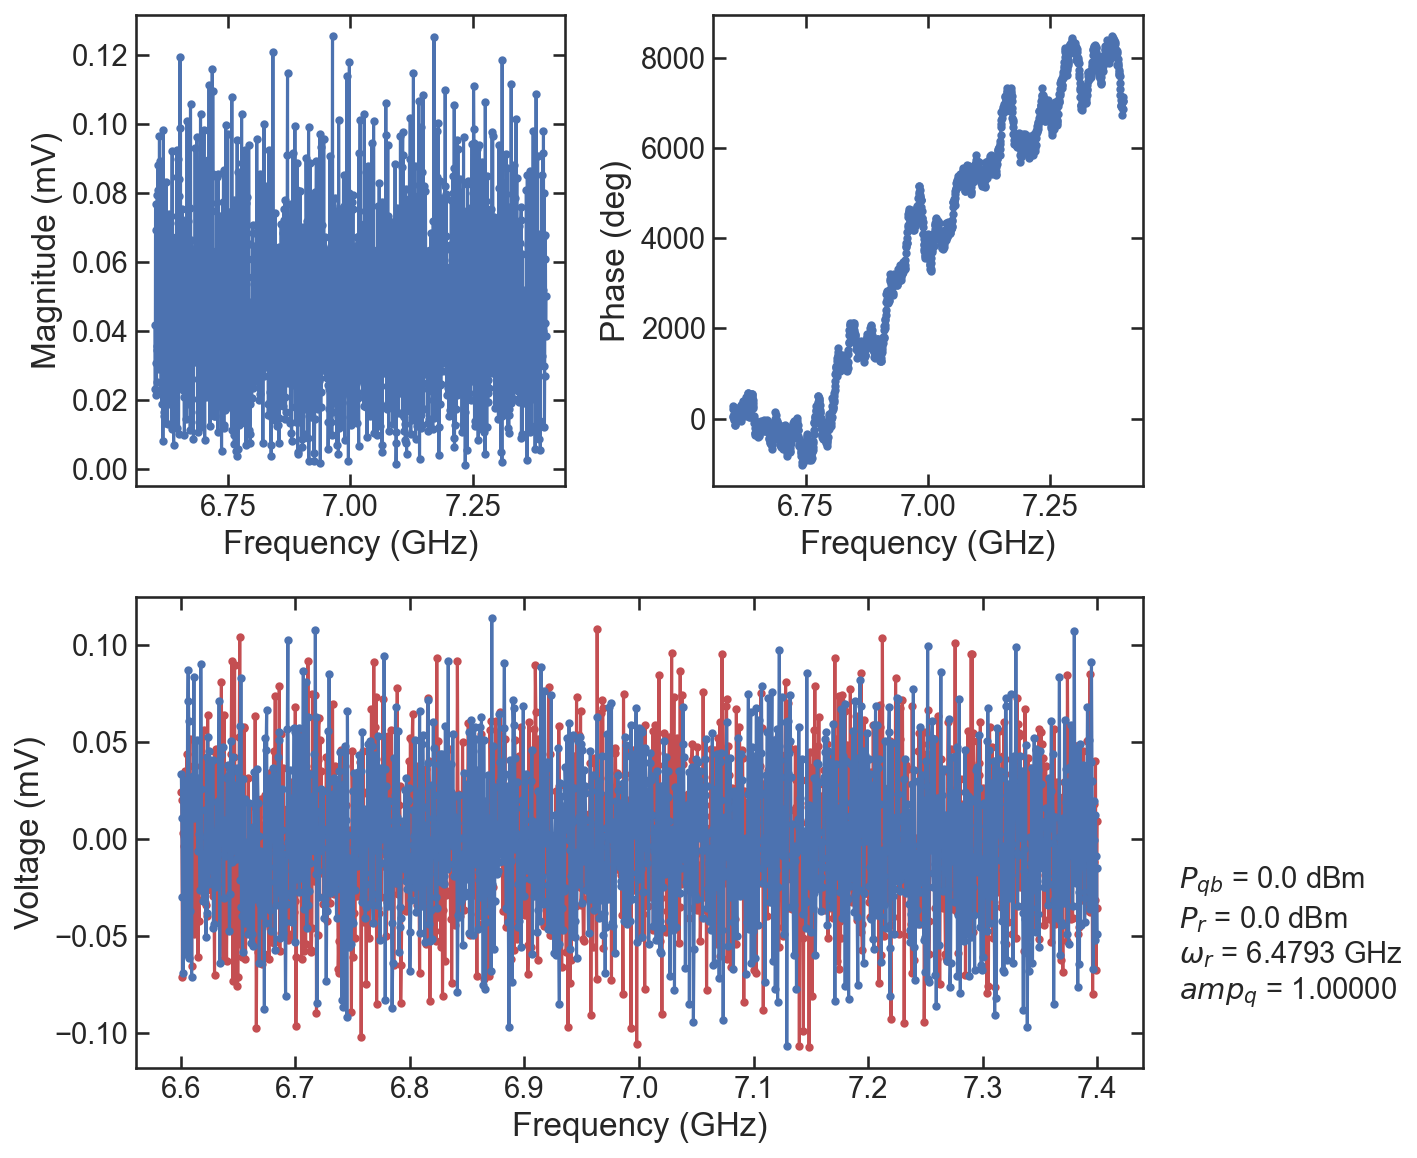

In [18]:
pf.qubit_spec_plot(data,qb_pars=qb.pars,df=df_qubit_spec,rrFreq=qb.pars['rr_freq'],amp_q_scaling=1)

In [ ]:
pf.qubit_spec_plot(data,qb_pars=qb.pars,df=df_qubit_spec,rrFreq=qb.pars['rr_freq'],amp_q_scaling=1)

In [206]:
qb.update_value('qubit_freq',4.9435e9)
# qb.update_value('qubit_IF',50e6)
qb.update_value('qubit_LO',4.7e9)

Updating qubit_freq to 4943500000.0
Updating qubit_IF to 243500000.0
Updating qubit_LO to 4700000000.0
Setting qubit_LO frequency to 4700000000.0.


# Rabi
Decrease the readout length to account for T1 decay

In [70]:
qb.update_value("readout_length", 2500)

Updating readout_length to 2500


In [30]:
qb.pars['gauss_amp']

0.4

## Power Rabi

In [101]:
qb.update_value('gauss_len',56)
qb.update_value('IQ_rotation',0)
qb.update_value('n_avg',2000)
# qb.update_value('gauss_amp',0.43)
qb.pars['resettime']['qubit'] = clk(200e3) #200us
qb.write_pars()
%matplotlib inline
data, job = qb.power_rabi(amin = 0.01,
                          amax = 1,
                          da = 0.01,
                          check_mixers = False,
                          simulate=False,
                          showprogress=True,)

Updating gauss_len to 56
Updating IQ_rotation to 0
Updating n_avg to 2000
2024-10-14 12:05:38,553 - qm - INFO     - Performing health check
2024-10-14 12:05:38,565 - qm - INFO     - Health check passed
2024-10-14 12:05:39,521 - qm - INFO     - Sending program to QOP for compilation
2024-10-14 12:05:39,834 - qm - INFO     - Executing program


100%|█████████▉| 1999/2000 [00:40<00:00, 49.88it/s]


Amplitude Initial Guess: 0.333
Updating X90_len to 56
Updating X180_len to 56
Updating X90_amp to 0.03341438191567986
Updating X180_amp to 0.06682876383135972


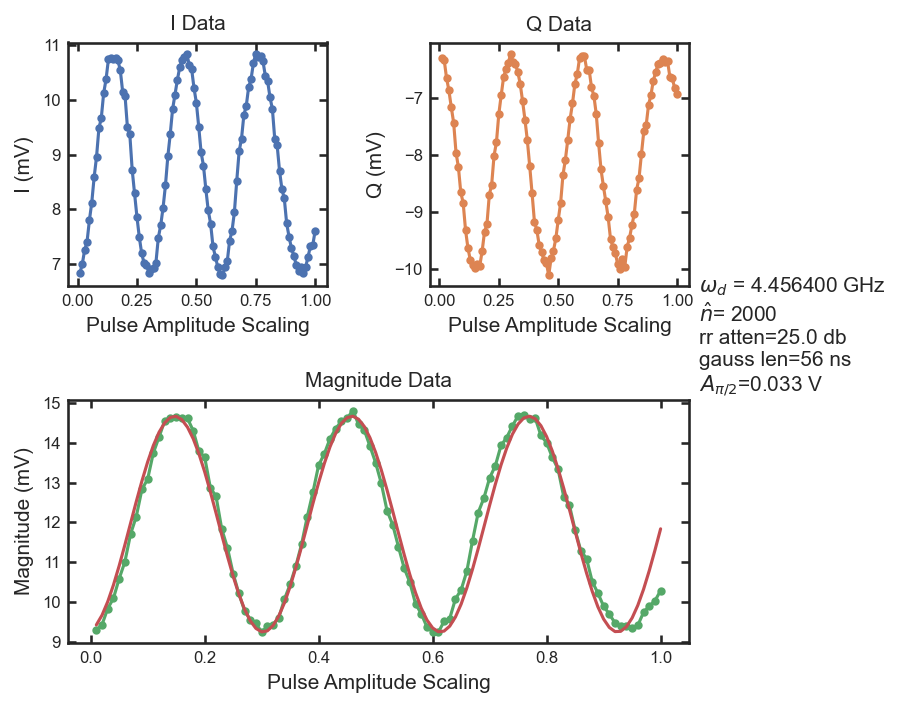

In [116]:
fitted_pars,error = pf.fit_data(data['amps'],
                                y_vector=np.abs(data['I']+1j*data['Q']),
                                sequence='p-rabi',
                                dt=data['amps'][-1]/len(data['amps']),
                                fitFunc='rabi')
pf.plot_data(x_vector=data['amps'], 
             y_vector=[data['I'],data['Q']],
             sequence='p-rabi',
             fitted_pars=fitted_pars, 
             iteration=1,
             rr_atten=qb.pars['readout_atten'],
             qubitDriveFreq=qb.pars['qubit_LO']+qb.pars['qubit_IF'],
             savefig=False,
             nAverages=qb.pars['n_avg'], 
             gauss_len=qb.pars['gauss_len'],
             gauss_amp=qb.pars['gauss_amp'])

qb.update_value('X90_len',qb.pars['gauss_len'])
qb.update_value('X180_len',qb.pars['gauss_len'])
qb.update_value('X90_amp',fitted_pars[1]/4*qb.pars['gauss_amp'])
qb.update_value('X180_amp',fitted_pars[1]/2*qb.pars['gauss_amp'])

## Time Rabi

In [130]:
# qb.update_value('gauss_len',500)
# qb.update_value('IQ_rotation',np.pi/4)
qb.update_value('n_avg',1000)
qb.update_value('gauss_amp',0.1)
qb.pars['resettime']['qubit'] = clk(200e3) #200us
qb.write_pars()
%matplotlib inline
data, job = qb.time_rabi(tmin = 4e-9,
                          tmax = 0.2e-6,
                          dt = 4e-9,
                          check_mixers = False,
                          simulate=False,
                          showprogress=True,)

Updating n_avg to 1000
Updating gauss_amp to 0.1
Nyquist frequency: 125.000 MHz
Highest frequency resolvable with at least 7 samples per period: 35.714 MHz
2024-10-14 12:51:55,587 - qm - INFO     - Performing health check
2024-10-14 12:51:55,600 - qm - INFO     - Health check passed
2024-10-14 12:51:56,669 - qm - INFO     - Sending program to QOP for compilation
2024-10-14 12:51:57,094 - qm - INFO     - Executing program


100%|█████████▉| 999/1000 [00:09<00:00, 101.25it/s]


Period Initial Guess: 65.3 ns


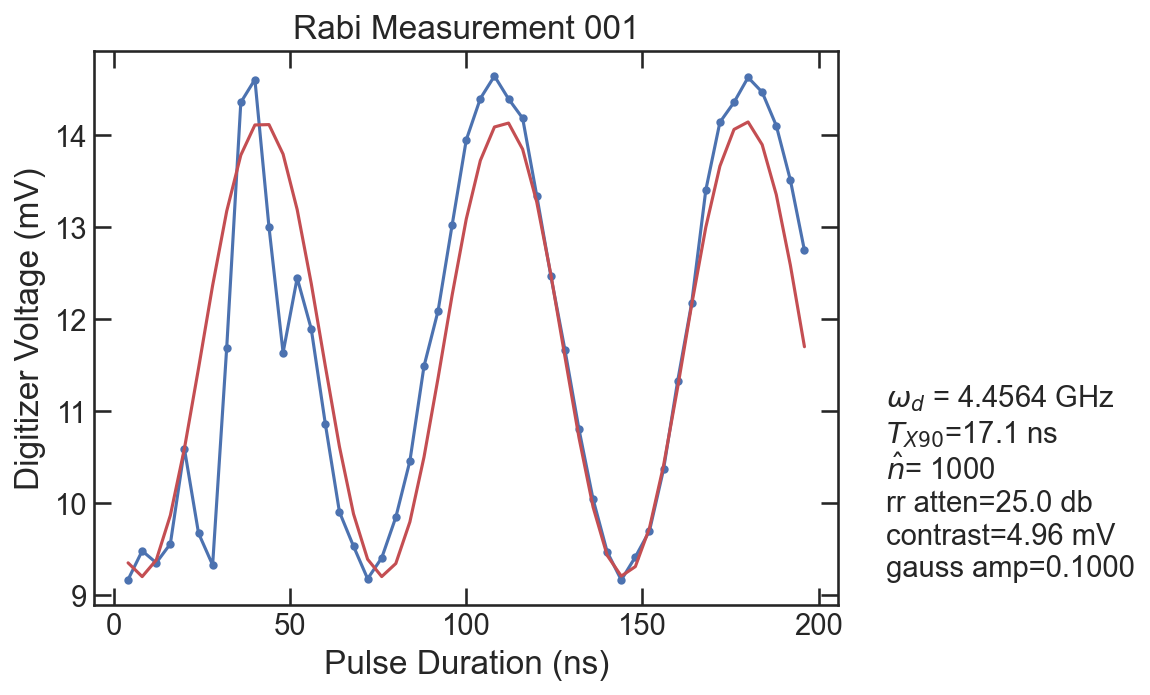

In [131]:
fitted_pars, error = pf.fit_data(data['times']*4/1e3,
                                 y_vector=np.abs(data['I'] + 1j * data['Q']),
                                 sequence='t-rabi',
                                 dt=data['times'][-1]*4/1e3 / len(data['times']),
                                 fitFunc='rabi')

pf.plot_data(x_vector=data['times']*4/1e3,
             y_vector=np.abs(data['I'] + 1j * data['Q']),
             sequence='t-rabi',
             fitted_pars=fitted_pars,
             iteration=1,
             rr_atten=qb.pars['readout_atten'],
             qubitDriveFreq=qb.pars['qubit_LO'] + qb.pars['qubit_IF'],
             savefig=False,
             nAverages=qb.pars['n_avg'],
             gauss_len=qb.pars['gauss_len'],
             gauss_amp=qb.pars['gauss_amp'])

# Ramsey

In [451]:
qb.update_value('n_avg',2000)
# qb.update_value('qubit_freq',qb.pars['qubit_freq']-)
qb.pars['resettime']['qubit'] = clk(200e3)
qb.write_pars()
%matplotlib inline
data, job = qb.ramsey(tmin = 10e-9,
                      tmax = 200e-6,
                      dt = 500e-9,
                      check_mixers = False,
                      simulate=False,
                      showprogress=True,)

Updating n_avg to 2000
Nyquist frequency: 1.000 MHz
Highest frequency resolvable with at least 7 samples per period: 0.286 MHz
2024-10-12 11:59:14,553 - qm - INFO     - Performing health check
2024-10-12 11:59:14,565 - qm - INFO     - Health check passed
2024-10-12 11:59:14,824 - qm - INFO     - Sending program to QOP for compilation
2024-10-12 11:59:14,921 - qm - INFO     - Executing program


100%|█████████▉| 1999/2000 [04:03<00:00,  8.22it/s]


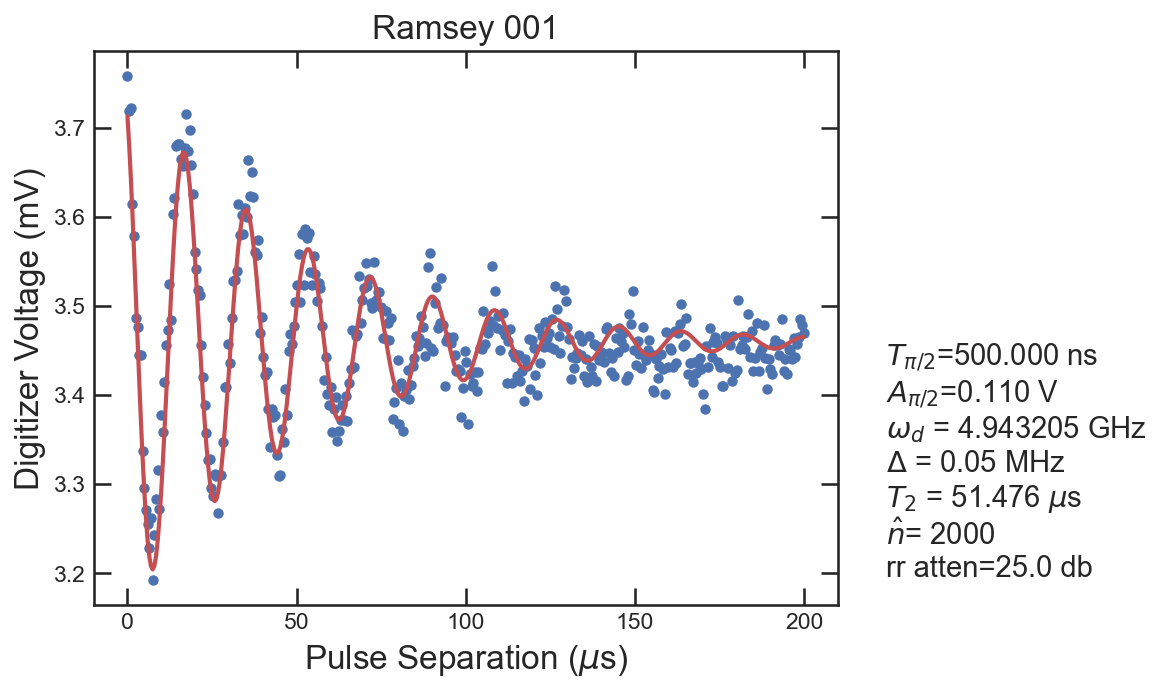

In [454]:
fitted_pars, error = pf.fit_data(data['times']*4/1e3,
                                 np.abs(data['I'] + 1j * data['Q']),
                                 sequence='ramsey',
                                 dt=data['times'][-1]*4/1e3 / len(data['times']),
                                 fitFunc='ramsey')

pf.plot_data(x_vector=data['times']*4/1e3,
             y_vector=np.abs(data['I'] + 1j * data['Q']),
             sequence='ramsey',
             fitted_pars=fitted_pars,
             iteration=1,
             fitFunc='ramsey',
             X90_len=qb.pars['X90_len'],
             X90_amp=qb.pars['X90_amp'], 
             rr_atten=qb.pars['readout_atten'],
             qubitDriveFreq=qb.pars['qubit_LO'] + qb.pars['qubit_IF'],
             savefig=False,
             nAverages=qb.pars['n_avg'],)
# qb.update_value('qubit_freq',qb.pars['qubit_freq']-fitted_pars[1]*1e6)

# T1

In [458]:
# qb.update_value('X180_amp',2*qb.pars['X90_amp'])
qb.update_value('n_avg',1000)
# qb.update_value('qubit_freq',4.9435e9+0.005e6)
# qb.update_value('readout_length', 5000)
# qb.pars['resettime']['qubit'] = clk(200e3)
qb.write_pars()
%matplotlib inline
data, job = qb.T1(tmin = 10e-9,
                      tmax = 100e-6,
                      dt = 1000e-9,
                      check_mixers = False,
                      simulate=False,
                      showprogress=True,)

Updating n_avg to 1000
2024-10-12 12:08:57,595 - qm - INFO     - Performing health check
2024-10-12 12:08:57,627 - qm - INFO     - Health check passed
2024-10-12 12:08:57,870 - qm - INFO     - Sending program to QOP for compilation
2024-10-12 12:08:57,971 - qm - INFO     - Executing program


100%|█████████▉| 998/1000 [00:25<00:00, 39.48it/s]


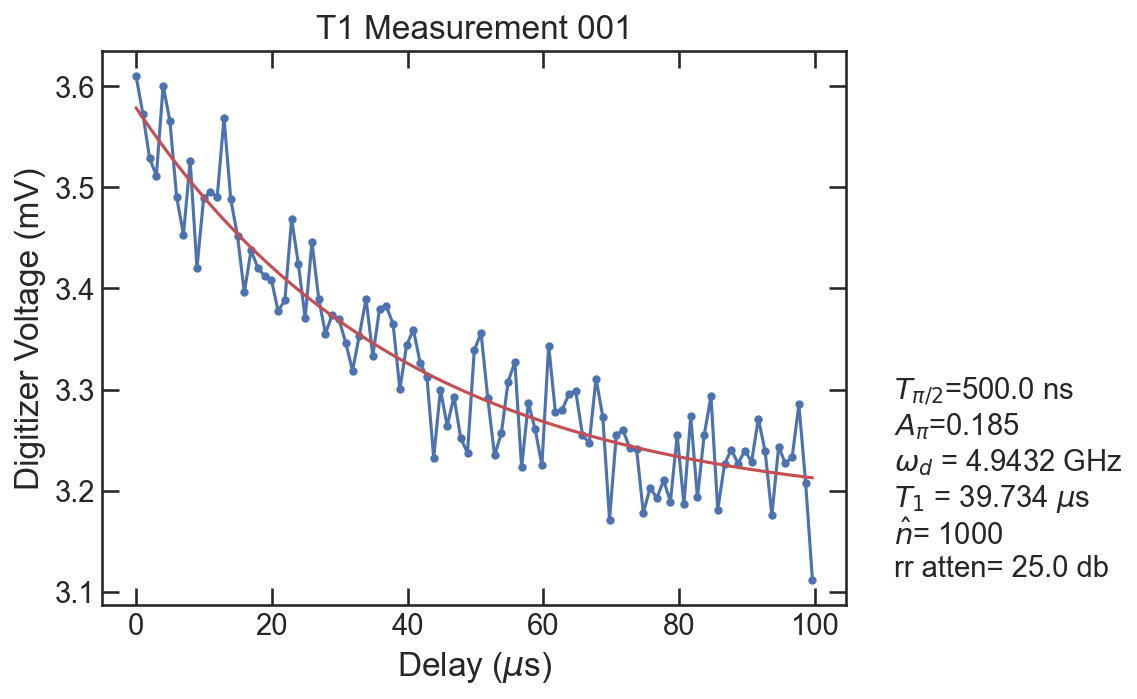

In [459]:
fitted_pars, error = pf.fit_data(data['times']*4/1e3,
                                 np.abs(data['I'] + 1j * data['Q']),
                                 dt = data['times'][-1]*4/1e3 / len(data['times']),
                                 sequence='T1',
                                 fitFunc='T1')

pf.plot_data(x_vector=data['times']*4/1e3,
             y_vector=np.abs(data['I'] + 1j * data['Q']),
             sequence='T1',
             fitted_pars=fitted_pars,
             iteration=1,
             fitFunc='T1',
             X180_len=qb.pars['X90_len'],
             X180_amp=qb.pars['X180_amp'], 
             rr_atten=qb.pars['readout_atten'],
             qubitDriveFreq=qb.pars['qubit_LO'] + qb.pars['qubit_IF'],
             savefig=False,
             nAverages=qb.pars['n_avg'],)

# Echo

In [486]:
qb.pars['X180_amp']

0.3252968221807733

In [5]:
qb.update_value('X180_amp',0.29)
qb.update_value('n_avg',1000)
# qb.update_value('qubit_freq',4.9435e9+0.005e6)
# qb.update_value('readout_length', 5000)
# qb.pars['resettime']['qubit'] = clk(200e3)
qb.write_pars()
%matplotlib inline
data, job = qb.echo(tmin = 10e-9,
                      tmax = 50e-6,
                      dt = 250e-9,
                      check_mixers = False,
                      simulate=False,
                      showprogress=True,)

Updating X180_amp to 0.29
Updating n_avg to 1000


TypeError: 'module' object is not callable

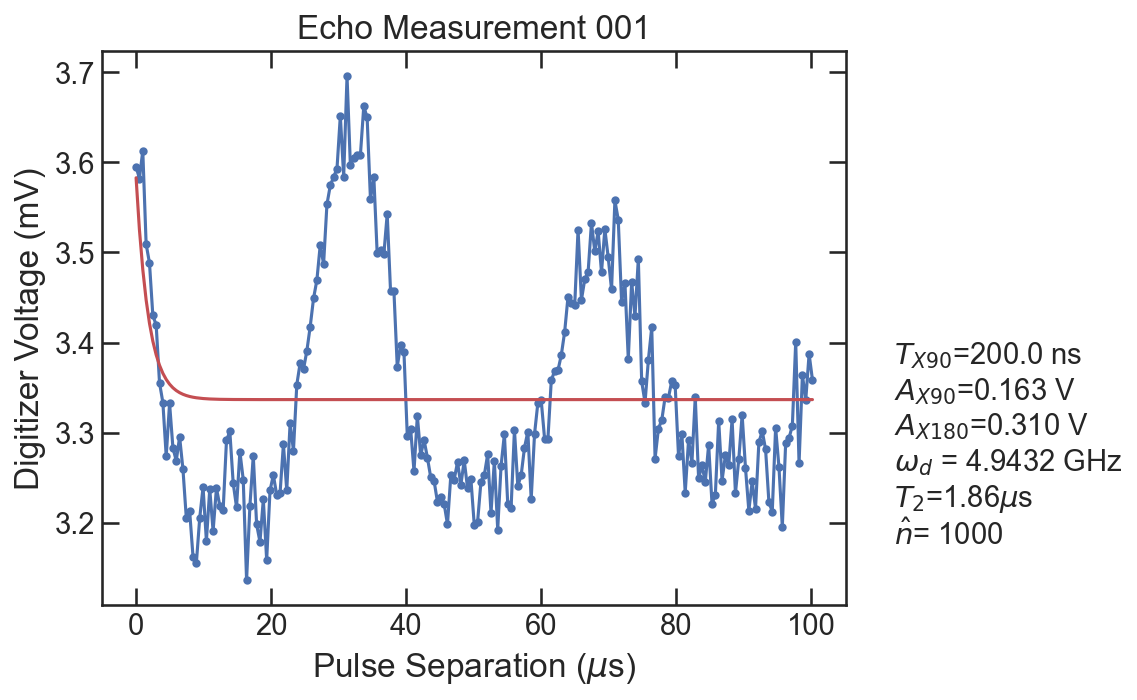

In [490]:
fitted_pars, error = pf.fit_data(2*data['times']*4/1e3,
                                 np.abs(data['I'] + 1j * data['Q']),
                                 dt = data['times'][-1]*4/1e3 / len(data['times']),
                                 sequence='echo',
                                 fitFunc='echo')

pf.plot_data(x_vector=2*data['times']*4/1e3,
             y_vector=np.abs(data['I'] + 1j * data['Q']),
             sequence='echo',
             fitted_pars=fitted_pars,
             iteration=1,
             fitFunc='echo',
             X90_len=qb.pars['X90_len'],
             X90_amp=qb.pars['X90_amp'], 
            X180_amp=qb.pars['X180_amp'],
             rr_atten=qb.pars['readout_atten'],
             qubitDriveFreq=qb.pars['qubit_LO'] + qb.pars['qubit_IF'],
             savefig=False,
             nAverages=qb.pars['n_avg'],)